# ADM 2022 HW 2 - Instagram Analysis

Done by:
* Gabriele Tromboni
* Ludovica Mazza
* Jonas Barth

# Index
1. [RQ1](#RQ1) - Exploratory Data Analysis
1. [RQ2](#RQ2) - Insights into profiles and posts
1. [RQ3](#RQ3) - Most common post times
1. [RQ4](#RQ4) - Deeper profile and post analysis
1. [RQ5](#RQ5) - Influential users
1. [RQ6](#RQ6) - Posting effectiveness
1. [RQ7](#RQ7) - Probabilities
1. [RQ8](#RQ8) - Charts, tests, analysis
1. [AQ1](#AQ1) - Recursive permutations
1. [AQ2](#AQ2) - Maximum ribbon product

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
import statistics
from datetime import datetime
import seaborn as sns
import datatable as dt
from posts import most_common_times, plot_posts_intervals, find_posts_between
from collections import Counter
pd.options.mode.chained_assignment = None

# RQ1

### Import data: INSTAGRAM PROFILES

In [2]:
profiles = pd.read_csv(r"D:\DATASET_ADM-HW2\archive\instagram_profiles.csv", delimiter='\t')

### EXPLORATORY ANALYSIS

In [40]:
print(profiles.shape)
print(profiles.columns)
profiles.head(10)


(4509586, 11)
Index(['sid', 'profile_id', 'profile_name', 'firstname_lastname',
       'description', 'following', 'followers', 'n_posts', 'url', 'cts',
       'is_business_account'],
      dtype='object')


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
5,4184465,1.450642e+08,sabahlke,Sarah bahlke,NaN,266.0,192.0,590.0,NaN,2019-08-01 14:40:16.443 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,Your spot for the best Western Mass. high scho...,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
7,4184472,1.446651e+09,hvcanes,Hoosac Valley,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:52.635 -0400,NaN
8,4184475,1.743726e+09,will_jay_k,William Kramer,I’d rather die a big death than live a small life,115.0,183.0,37.0,NaN,2019-08-01 14:40:59.969 -0400,False
9,4184476,5.455198e+09,ashley_downing722,Ashley Downing,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:41:12.826 -0400,NaN


#### We have a dataset of about 4 million observations: each one represents an instagram profile. 
For each observation we have 11 observed variables:
- sid (sequence ID)
- profile_id 
- profile_name
- first_name (person's first and last name)
- description (a sort of short biography of the person)
- following
- followers
- n_posts
- url (any link the person wants to share through their profile)
- cts (date and time the profile was last visited)
- is_business_account (if the person has a business account) 

#### What is noticeable (even from just the first 10 rows) is the large amount of NaN in the dataset. The only two varibles with all values entered are those referring to profile IDs.

In [42]:
profiles.isnull().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

### Import data: INSTAGRAM LOCATIONS

In [43]:
locations = pd.read_csv(r"D:\DATASET_ADM-HW2\archive\instagram_locations.csv", delimiter='\t')

### EXPLORATORY ANALYSIS

In [44]:
print(locations.shape)
print(locations.columns)
locations.head(10)

(1022658, 23)
Index(['sid', 'id', 'name', 'street', 'zip', 'city', 'region', 'cd', 'phone',
       'aj_exact_city_match', 'aj_exact_country_match', 'blurb', 'dir_city_id',
       'dir_city_name', 'dir_city_slug', 'dir_country_id', 'dir_country_name',
       'lat', 'lng', 'primary_alias_on_fb', 'slug', 'website', 'cts'],
      dtype='object')


,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703
5,326440,242403516699715,The Lakes at Discovery Bay,NaN,NaN,NaN,NaN,NaN,(925) 308-3883,NaN,...,NaN,NaN,NaN,NaN,-121.621549,37.925412,TheLakesatDiscoveryBay,the-lakes-at-discovery-bay,www.TheLakesatDiscoveryBay.com,2019-04-02 15:22:55.367
6,719988,1651686855080719,"Tampines, Singapore",Tampines,529941,Singapore,NaN,SG,NaN,False,...,NaN,NaN,NaN,NaN,103.949729,1.355203,TampinesZingapurA,tampines-singapore,NaN,2019-05-29 01:21:56.635
7,719992,240487083,Sittano’s Bar & Restaurant,"Shop R03 Westfield Penrith, Level 1 / Riley St...",2750,"Penrith, New South Wales",NaN,AU,0247224444,False,...,Penrith,penrith,AU,Australia,150.694367,-33.751031,Sittanos,sittanos-bar-restaurant,http://www.sittanos.com.au/,2019-05-29 01:22:12.909
8,719996,750669435108256,วัดท่าซุง อุทัยธานี,3212,61000,"Nam Soem, Uthai Thani, Thailand",NaN,TH,0854623871,False,...,NaN,NaN,NaN,NaN,100.073586,15.329776,NaN,NaN,http://www.watthasung.com,2019-05-29 01:22:27.749
9,719998,223283275,Cine Atlas,Hatanpään valtatie 1,33100,"Tampere, Finland",NaN,FI,NaN,False,...,NaN,NaN,NaN,NaN,23.766263,61.495690,NaN,cine-atlas,http://www.finnkino.fi/cinemas/tampere_cine_atlas,2019-05-29 01:22:35.936


#### We have a dataset of about 1 million rows: each row gives us information about where content has been posted by users. 
The observed variables are:
- sid (sequence ID)
- id
- name (locations names)
- street (street address)
- zip (zip code)
- city (city name)
- region (region name)
- cd (country code)
- phone (phone's number)
- aj_exact_city_match
- aj_exact_country_match
- blurb (description of the place)
- dir_city_id (instagram internal City ID)
- dir_city_name (city name)
- dir_city_slug (city tag)
- dir_country_id 
- dir_country_name
- lat (latitude)
- lng (longitude)
- primary_alias_on_fb
- slug 
- website (profile's website)
- cts (timestamp when the location was visited)

In [45]:
locations.isnull().sum()

sid                             0
id                              0
name                            0
street                     306954
zip                        307079
city                        85492
region                    1020898
cd                          83648
phone                      420970
aj_exact_city_match         22148
aj_exact_country_match      22148
blurb                      615953
dir_city_id                526960
dir_city_name              526960
dir_city_slug              527437
dir_country_id             527030
dir_country_name           526960
lat                          6163
lng                          6163
primary_alias_on_fb        597127
slug                        80990
website                    399396
cts                             0
dtype: int64

#### Just as in the profile dataset, there are also many null values in this dataset. 
In particular, we note that the region variable has 99% of the observations missing and that all variables containing instagram internal information have NaNs for half of the observations. 

### Import data: INSTAGRAM POSTS

In [46]:
for post in pd.read_csv(r"D:\DATASET_ADM-HW2\archive\instagram_posts.csv", sep="\t",
                        chunksize=500000):
    print(post.head(2))

        sid  sid_profile      post_id  profile_id   location_id  \
0  28370919      3496776  BXdjjUlgcgq  2237947779  1.022366e+15   
1  28370932           -1  BVg0pbolYBC  5579335020  4.574268e+14   

                       cts  post_type  \
0  2017-08-06 20:06:57.000          2   
1  2017-06-19 09:31:16.000          1   

                                         description  numbr_likes  \
0  Wreckloose! Deevalley bike park laps on the @i...           80   
1  🙌🏼 believe in ya dreams 🙌🏼 just like I believe...           25   

   number_comments  
0                0  
1                1  
             sid  sid_profile      post_id   profile_id  location_id  \
500000  28878523           -1  BdwGfXQjgpO   34786095.0  301123209.0   
500001  28878524           -1  BRI8VmcBit_  338020809.0  301123209.0   

                            cts  post_type  \
500000  2018-01-10 03:06:56.000          1   
500001  2017-03-02 15:51:06.000          1   

                                              d

              sid  sid_profile      post_id  profile_id  location_id  \
6500000  35132149           -1  Bi-qcd-l8ZZ    21631875  283247724.0   
6500001  35132076           -1  Bx-wlo0lQI0  1646471253  404330822.0   

                             cts  post_type  \
6500000  2018-05-20 02:27:27.000          1   
6500001  2019-05-27 23:12:02.000          1   

                                               description  numbr_likes  \
6500000  It’s a..... BOY!!! 💙💙💙💙💙💙 Kaden Douglas we can...          197   
6500001  Un pequeño compartir junto a las demás compañe...           19   

         number_comments  
6500000               11  
6500001                0  
              sid  sid_profile      post_id  profile_id  location_id  \
7000000  35663445           -1  Bx5vhuuCEav   271013047    9163114.0   
7000001  35663446           -1  Bx5ZvbdIqdn   258133359    9163114.0   

                             cts  post_type  \
7000000  2019-05-26 00:26:34.000          1   
7000001  2019-05-25 21:

               sid  sid_profile      post_id   profile_id  location_id  \
13000000  40428362      4046364  BzYvj6JAg7a  190499836.0  227437833.0   
13000001  40428363      4046364  BzEaU4ZgeIB  190499836.0          NaN   

                              cts  post_type  \
13000000  2019-07-01 21:54:43.000          1   
13000001  2019-06-24 00:24:21.000          1   

                                                description  numbr_likes  \
13000000  Happiness is good health!  Thankful for these ...           97   
13000001  Occasional nights out have turned into the nor...          117   

          number_comments  
13000000                4  
13000001               31  
               sid  sid_profile      post_id   profile_id   location_id  \
13500000  40868639      4169211  B0iyoSGnggJ  392437889.0  2.861738e+14   
13500001  40868640      4169211  B0iwNNcnuZj  392437889.0  7.324986e+08   

                              cts  post_type  \
13500000  2019-07-30 16:05:19.000          1 

              sid  sid_profile      post_id    profile_id  location_id  \
19500000  4645284       917711  BvMNE5IAg4b  2.114484e+09          NaN   
19500001  4645285       917711  BvCKuEQgDkp  2.114484e+09          NaN   

                              cts  post_type  \
19500000  2019-03-19 08:56:55.000          1   
19500001  2019-03-15 11:23:55.000          1   

                                                description  numbr_likes  \
19500000  Blue light could be damaging your #skin right ...         18.0   
19500001  Check out Intercosmetics Trilogy Precious Drop...          9.0   

          number_comments  
19500000              0.0  
19500001              0.0  
            sid  sid_profile      post_id  profile_id  location_id  \
20000000  73244        26085  Bhc5HlAHQO6         NaN          NaN   
20000001  73246        26085  Bg68CcThp7B         NaN          NaN   

                              cts  post_type  \
20000000  2018-04-11 21:10:06.000          1   
20000001  20

               sid  sid_profile      post_id   profile_id   location_id  \
26000000  10255690      3399761  Bv_LKW3FIRv  275225565.0  1.303710e+14   
26000001  10255691      3399761  Bv_K1dolhnQ  275225565.0  3.022577e+08   

                              cts  post_type  \
26000000  2019-04-08 10:01:27.000          1   
26000001  2019-04-08 09:58:36.000          1   

                                                description  numbr_likes  \
26000000  Trevi Fountain 🔱\n-\n-\n-\n-\n#rome #italy #ro...           37   
26000001  Piazza San Pietro 🇻🇦\n-\n-\n-\n-\n#rome #italy...           32   

          number_comments  
26000000                0  
26000001                0  
               sid  sid_profile      post_id    profile_id  location_id  \
26500000  10762841      3442617  BwrBQwAgMGa  1.305334e+09  221630742.0   
26500001  10762877      3442625  BwXTsPBhSKo  4.539566e+09  214568397.0   

                              cts  post_type  \
26500000  2019-04-25 10:41:32.000         

               sid  sid_profile      post_id    profile_id  location_id  \
32500000  18021645           -1  BxIotzalDja  9.657026e+09  736495837.0   
32500001  18021648           -1  Bwnk5-2lofB  2.907665e+09  736495837.0   

                              cts  post_type  \
32500000  2019-05-06 22:44:16.000          1   
32500001  2019-04-24 02:36:02.000          1   

                                            description  numbr_likes  \
32500000     2018 Raceland Girls Tennis Team! #GoRams 🎾            6   
32500001  Senior prom with the best (and cutest) date:)           69   

          number_comments  
32500000                0  
32500001                3  
               sid  sid_profile      post_id    profile_id  location_id  \
33000000  18536912      2369008  BxQmRqYAbG0  8.934247e+09          NaN   
33000001  18536919      2369008  Bw8UlUMgUU-  8.934247e+09          NaN   

                              cts  post_type          description  \
33000000  2019-05-10 00:57:08.000

               sid  sid_profile      post_id    profile_id  location_id  \
39000000  24595046           -1  Bt_cHGSHrqi  2.234050e+08  320815129.0   
39000001  24595114           -1  BwppKBFJr4u  1.760912e+09  958317266.0   

                              cts  post_type  \
39000000  2019-02-17 18:26:46.000          1   
39000001  2019-04-24 21:51:39.000          1   

                                                description  numbr_likes  \
39000000  Viernes comida imprevista \n#pizza #rest #meno...           18   
39000001                                 M i x &  M a t c h          568   

          number_comments  
39000000                0  
39000001                4  
               sid  sid_profile      post_id    profile_id   location_id  \
39500000  25096349           -1  BxUpwkchuN1  2.300728e+09  1.030945e+09   
39500001  25096360           -1  BxRzdchDSOO  9.432784e+09  1.030945e+09   

                              cts  post_type  \
39500000  2019-05-11 14:44:16.000      

#### This dataset contains over 42 million rows containing information about the different posts.
The observed variables are:
- sid  
- sid_profile      
- post_id    
- profile_id  
- location_id
- cts (timestamp when the Post was created)
- post_type (1 - Photo, 2 - Video, 3 - both)
- descriptions
- numbr_likes (number of likes at the moment it was visited)
- number_comments (number of comments at the moment it was visited)

#### Given the size of the dataset, in order to work better with it, we could subset it by excluding the description column as it is not relevant for our analysis. 

In [47]:
for post in pd.read_csv(r"D:\DATASET_ADM-HW2\archive\instagram_posts.csv", 
                        sep="\t",chunksize=500000, usecols=["sid","sid_profile","post_id","profile_id","location_id","cts","post_type","numbr_likes","number_comments"]):
    print(post.head(2))

        sid  sid_profile      post_id  profile_id   location_id  \
0  28370919      3496776  BXdjjUlgcgq  2237947779  1.022366e+15   
1  28370932           -1  BVg0pbolYBC  5579335020  4.574268e+14   

                       cts  post_type  numbr_likes  number_comments  
0  2017-08-06 20:06:57.000          2           80                0  
1  2017-06-19 09:31:16.000          1           25                1  
             sid  sid_profile      post_id   profile_id  location_id  \
500000  28878523           -1  BdwGfXQjgpO   34786095.0  301123209.0   
500001  28878524           -1  BRI8VmcBit_  338020809.0  301123209.0   

                            cts  post_type  numbr_likes  number_comments  
500000  2018-01-10 03:06:56.000          1          150                5  
500001  2017-03-02 15:51:06.000          1          134                8  
              sid  sid_profile      post_id  profile_id   location_id  \
1000000  29388104           -1  BbOwziDBrSJ   355609069  1.797827e+15   


              sid  sid_profile      post_id    profile_id   location_id  \
9500000  37627501      3651261  Bx7tGMeHXCE  4.599182e+08  2.875077e+08   
9500001  34172628      3651259  ByXn-1vniHS  1.273958e+10  1.356787e+15   

                             cts  post_type  numbr_likes  number_comments  
9500000  2019-05-26 18:43:49.000          1            6                0  
9500001  2019-06-06 14:57:51.000          1          170                0  
               sid  sid_profile      post_id  profile_id  location_id  \
10000000  38024763      3705498  Byi4MTnJZTW  16414251.0     212789.0   
10000001  38024773      3705498  Byf0ullJ8Gs  16414251.0      53680.0   

                              cts  post_type  numbr_likes  number_comments  
10000000  2019-06-10 23:51:09.000          1           13                0  
10000001  2019-06-09 19:23:09.000          1            7                0  
               sid  sid_profile      post_id   profile_id  location_id  \
10500000  38413054   

              sid  sid_profile      post_id   profile_id  location_id  \
19000000  4110493       706218  BbX9tvHlxjK  230230609.0          NaN   
19000001  4110496       706218  BbXrCSWl2Av  230230609.0  214061773.0   

                              cts  post_type  numbr_likes  number_comments  
19000000  2017-11-12 00:05:41.000          1           92                0  
19000001  2017-11-11 21:22:28.000          1           62                4  
              sid  sid_profile      post_id    profile_id  location_id  \
19500000  4645284       917711  BvMNE5IAg4b  2.114484e+09          NaN   
19500001  4645285       917711  BvCKuEQgDkp  2.114484e+09          NaN   

                              cts  post_type  numbr_likes  number_comments  
19500000  2019-03-19 08:56:55.000          1         18.0              0.0  
19500001  2019-03-15 11:23:55.000          1          9.0              0.0  
            sid  sid_profile      post_id  profile_id  location_id  \
20000000  73244        26

               sid  sid_profile      post_id    profile_id  location_id  \
28500000  13021318      1608419  Bm3yZZglETg  1.934890e+09     683630.0   
28500001  13021319      1608419  Bmb50QWFJkr  1.934890e+09          NaN   

                              cts  post_type  numbr_likes  number_comments  
28500000  2018-08-24 20:27:50.000          1          108                3  
28500001  2018-08-14 00:33:55.000          1          140                6  
               sid  sid_profile      post_id    profile_id   location_id  \
29000000  13591556           -1  BjoF1K6Fv7d  5.875738e+09  1.460589e+15   
29000001  13591559           -1  BjnbRboATzK  7.280932e+08  1.460589e+15   

                              cts  post_type  numbr_likes  number_comments  
29000000  2018-06-05 04:35:37.000          1           56                1  
29000001  2018-06-04 22:23:44.000          1          396               45  
               sid  sid_profile      post_id    profile_id  location_id  \
29500000

               sid  sid_profile      post_id    profile_id  location_id  \
37500000  23123557           -1  BxxiAuSo7e4  2.175486e+09  162356927.0   
37500001  23123562           -1  BxxVJGSIzce  1.802883e+09  162356927.0   

                              cts  post_type  numbr_likes  number_comments  
37500000  2019-05-22 19:54:32.000          1           70                0  
37500001  2019-05-22 18:02:05.000          1           25                0  
               sid  sid_profile      post_id    profile_id  location_id  \
38000000  23624568      2972272  BbyRMLmgRi0  4.778973e+09          NaN   
38000001  23624573      2972272  BbfwoHlgUNN  4.778973e+09          NaN   

                              cts  post_type  numbr_likes  number_comments  
38000000  2017-11-22 06:16:07.000          1           24                1  
38000001  2017-11-15 01:45:15.000          1           46                0  
               sid  sid_profile      post_id   profile_id  location_id  \
38500000  24

In [3]:
pip install datatable 

---

# RQ2
# Let's explore the dataset by finding simple insights regarding the profile and posts.

## Plot the number of posts for each profile in descending order.

#### We take only the columns of interest to us from our DataFrame 'instagram_profiles.csv' to give an answer to all these questions below.

In [2]:
prof_data = dt.fread('instagram_profiles.csv', sep='\t', columns={"profile_name", "firstname_lastname", "n_posts", "is_business_account"}).to_pandas()

In [3]:
prof_data

,profile_name,firstname_lastname,n_posts,is_business_account
0,jphillip033,John Pierce,170.0,False
1,mama_haas,Deanna,2878.0,False
2,yellowlightbreen,Eliza Gray,431.0,False
3,tec1025,Thomas Clark,NaN,NaN
4,luckyfluff,,NaN,NaN
...,...,...,...,...
4509581,karenarkesteyn,Karen Arkesteyn,497.0,False
4509582,jornvlaeminck,Jorn Vlaeminck,NaN,NaN
4509583,s_degol,Sanne Degol,NaN,NaN
4509584,anwilms,An Wilms,183.0,False


#### As we could see in RQ1, in the DataFrame there are many NaN values so now we remove the row of  prof_data where such 'non-values' are present in these columns and then we want to sort these in descending order.

In [4]:
prof_posts = prof_data[['profile_name', 'n_posts']].dropna().sort_values("n_posts", ascending=False)

In [5]:
prof_posts

,profile_name,n_posts
3990313,jasem33312,183730.0
2571453,koenigpic,142428.0
4338921,rudyanto62,126340.0
3942129,hometown_ni,125220.0
4219642,dwfitfiber_thailand,117262.0
...,...,...
2402230,faith.dever,0.0
2402229,sugarsprinkledglitter,0.0
377966,hannahkraft13,0.0
2402225,4pf_cj_,0.0


In [6]:
prof_posts['n_posts'] = prof_posts['n_posts'].astype(int)

In [7]:
prof_posts

,profile_name,n_posts
3990313,jasem33312,183730
2571453,koenigpic,142428
4338921,rudyanto62,126340
3942129,hometown_ni,125220
4219642,dwfitfiber_thailand,117262
...,...,...
2402230,faith.dever,0
2402229,sugarsprinkledglitter,0
377966,hannahkraft13,0
2402225,4pf_cj_,0


#### As a final step, let's graph the top 100 profiles with the most posts to take a look of how many posts were posted by them.

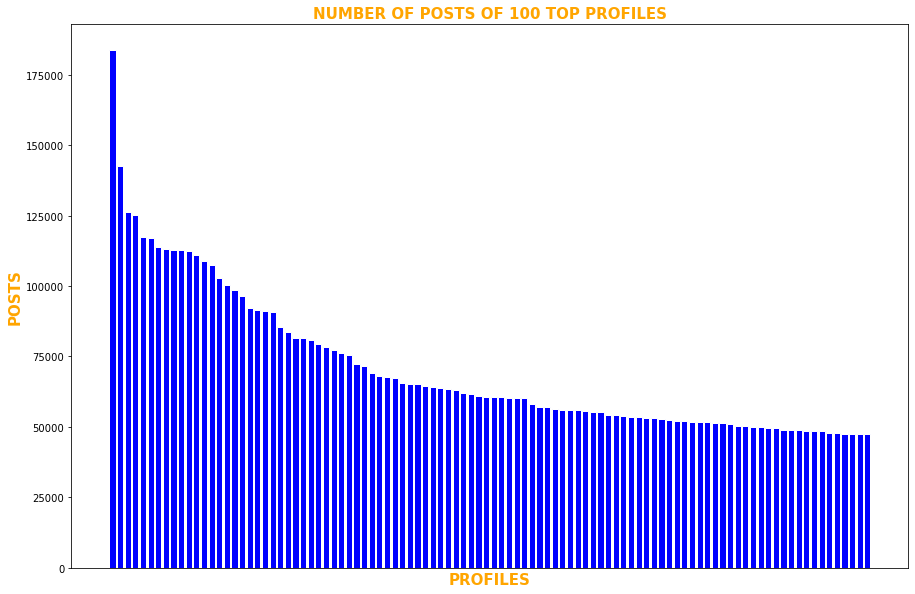

In [8]:
plt.figure(figsize=(15,10))
plt.bar(prof_posts.profile_name[:100], prof_posts.n_posts[:100], color='blue', edgecolor='white', align='center')
plt.title('NUMBER OF POSTS OF 100 TOP PROFILES', fontweight='bold', color = 'orange', fontsize='15')
plt.xlabel('PROFILES', fontweight='bold', color = 'orange', fontsize='15')
plt.ylabel('POSTS', fontweight='bold', color = 'orange', fontsize='15')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

## What posts have the highest number of "likes"?

####  We take only the columns of interest to us from our DataFrame 'instagram_posts.csv' to give an answer to all these questions below.

In [9]:
post_data = dt.fread('instagram_posts.csv', sep='\t', columns={"post_id", "numbr_likes", "number_comments", "location_id", "post_type"}).to_pandas()

In [10]:
post_likes= post_data[['post_id', 'numbr_likes']]
post_likes

,post_id,numbr_likes
0,BXdjjUlgcgq,80.0
1,BVg0pbolYBC,25.0
2,BRgkjcXFp3Q,9.0
3,BKTKeNhjEA7,4.0
4,8-NQrvoYLX,8.0
...,...,...
42710192,BcpWMWGBfxh,74.0
42710193,Ba6LZWwlCl8,49.0
42710194,BPN0kM1hYUw,18.0
42710195,BxsZ8nDBr-L,27.0


#### Here we show what are the first 25 posts with the highest number of likes.

In [11]:
post_likes = post_likes.dropna().sort_values("numbr_likes", ascending=False)
post_likes['numbr_likes'] = post_likes['numbr_likes'].astype(int)
post_likes.head(25)

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952
19623988,BuwffB7g8cK,5447066
19624082,Buc1gyZAaMQ,5116398
19623986,BvcukE8AMuG,4271466
39701024,BqSLFVBFLfq,4264745
6293907,BwTSXBKg7gN,3586546
19624086,Btw8pFXAvQm,3558599
19802016,BvC3n6_gqin,3533326
30850564,Bw7vqLrFkHi,3340297
39812576,Bw2gTH1AiDA,3311246


#### Plot that represents the number of likes of 100 top posts.

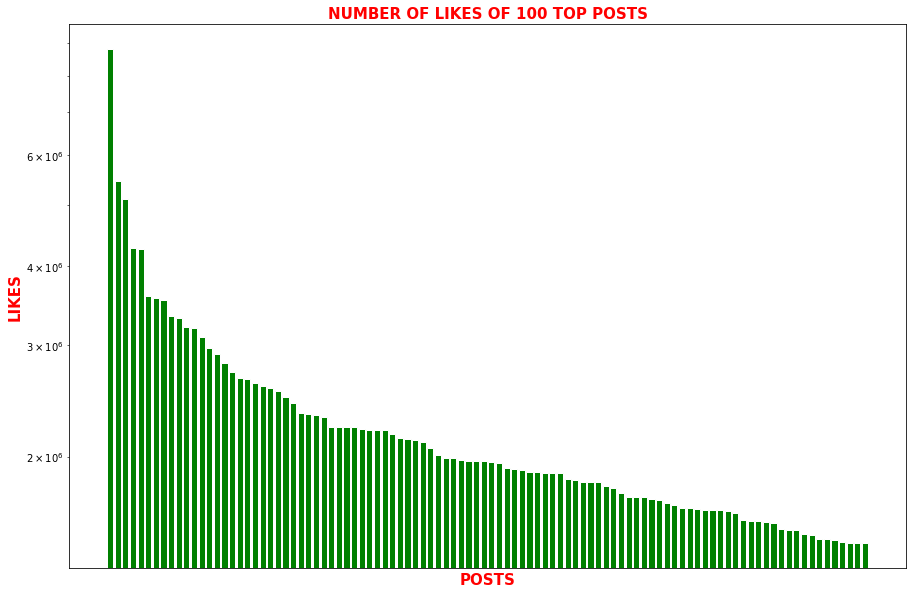

In [12]:
plt.figure(figsize=(15,10))
plt.bar(post_likes.post_id[:100], post_likes.numbr_likes[:100], color='green', edgecolor='white', align='center', log=True)
plt.title('NUMBER OF LIKES OF 100 TOP POSTS', fontweight='bold', color = 'red', fontsize='15')
plt.xlabel('POSTS', fontweight='bold', color = 'red', fontsize='15')
plt.ylabel('LIKES', fontweight='bold', color = 'red', fontsize='15')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

## What posts have the most and the least number of comments?

In [13]:
post_comms = post_data[['post_id','number_comments']].dropna()

In [14]:
post_comms['number_comments'] = post_comms['number_comments'].astype(int)
post_comms

,post_id,number_comments
0,BXdjjUlgcgq,0
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,0
3,BKTKeNhjEA7,0
4,8-NQrvoYLX,0
...,...,...
42710192,BcpWMWGBfxh,0
42710193,Ba6LZWwlCl8,0
42710194,BPN0kM1hYUw,0
42710195,BxsZ8nDBr-L,1


In [15]:
most_comms = post_comms[post_comms['number_comments'] == post_comms.number_comments.max()]
most_comms

,post_id,number_comments
41873060,Bx2sPAjHviO,488953


In [16]:
least_comms = post_comms[post_comms['number_comments'] == post_comms.number_comments.min()]

In [17]:
least_comms

,post_id,number_comments
0,BXdjjUlgcgq,0
2,BRgkjcXFp3Q,0
3,BKTKeNhjEA7,0
4,8-NQrvoYLX,0
11,Bx-ptmpinBs,0
...,...,...
42710190,BpeRbppFQ2l,0
42710191,Bdx3o7WDypu,0
42710192,BcpWMWGBfxh,0
42710193,Ba6LZWwlCl8,0


In [18]:
print(f" Post: {most_comms.iloc[0, :].post_id} has the most number of comments: {most_comms.iloc[0, :].number_comments}")
print(f" {least_comms.iloc[0, :].post_id} is the first post which has the least number of comments: {least_comms.iloc[0, :].number_comments}")

 Post: Bx2sPAjHviO has the most number of comments: 488953
 BXdjjUlgcgq is the first post which has the least number of comments: 0


## How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [19]:
loc_data = post_data[['post_id', 'location_id']]
loc_data

,post_id,location_id
0,BXdjjUlgcgq,1.022366e+15
1,BVg0pbolYBC,4.574268e+14
2,BRgkjcXFp3Q,4.574268e+14
3,BKTKeNhjEA7,4.574268e+14
4,8-NQrvoYLX,4.574268e+14
...,...,...
42710192,BcpWMWGBfxh,4.574268e+14
42710193,Ba6LZWwlCl8,4.574268e+14
42710194,BPN0kM1hYUw,4.574268e+14
42710195,BxsZ8nDBr-L,4.267235e+06


#### Count how many posts have or not have tagged locations with .isna and .notna commands. Then we create this small DataFrame.

In [20]:
unlocated = loc_data.location_id.isna().sum()
located = loc_data.location_id.notna().sum()
results = {'location':[True,False], 'n_posts' : [located, unlocated]}
post_loc = pd.DataFrame(results)
post_loc

,location,n_posts
0,True,29737425
1,False,12972772


#### Show it as a barplot.

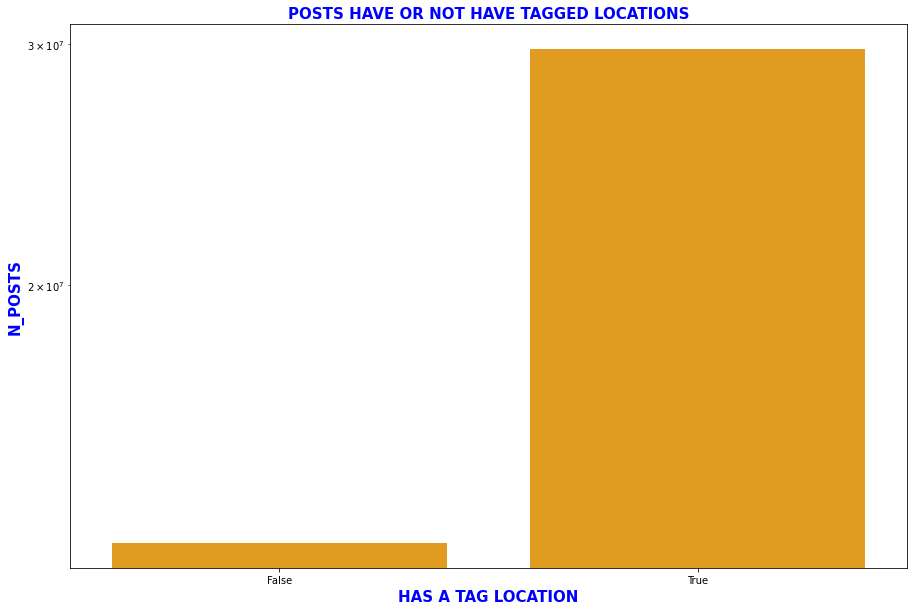

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(
    y="n_posts", 
    x="location", 
    data=post_loc, 
    estimator=sum, 
    ci=None, 
    color='orange',
    log=True)
plt.title("POSTS HAVE OR NOT HAVE TAGGED LOCATIONS", fontweight='bold', color = 'blue', fontsize='15')
plt.xlabel('HAS A TAG LOCATION', fontweight='bold', color = 'blue', fontsize='15')
plt.ylabel('N_POSTS', fontweight='bold', color = 'blue', fontsize='15')
plt.show()

## How many posts include only photos? How many also have videos?

In [22]:
types = post_data[['post_id', 'post_type']]
types

,post_id,post_type
0,BXdjjUlgcgq,2
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,1
3,BKTKeNhjEA7,1
4,8-NQrvoYLX,1
...,...,...
42710192,BcpWMWGBfxh,1
42710193,Ba6LZWwlCl8,1
42710194,BPN0kM1hYUw,1
42710195,BxsZ8nDBr-L,1


#### We know when post_type is equal to 1 means that the post have only photos, when it is equal to 2 means that the post are videos and when it is equal to 3 means that the post are multi, that is they have photos and videos simultaneously.

#### So we count posts have only photos and those that have also videos

In [23]:
print(f" Number of posts have only photos: {(types['post_type'] == 1.0).sum()}")
print(f" Number of posts have also videos: {(types['post_type'] > 1.0).sum()}")

 Number of posts have only photos: 41534486
 Number of posts have also videos: 1175711


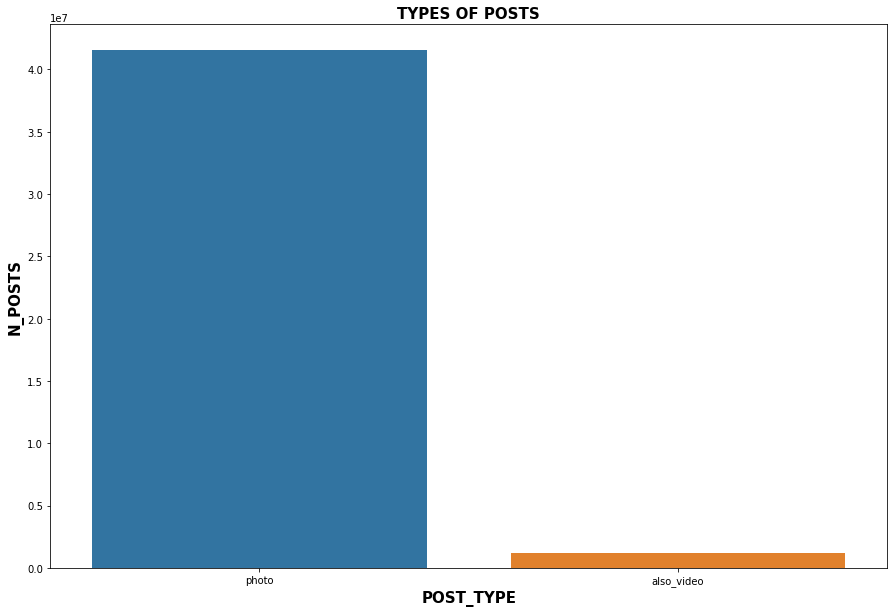

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x=['photo', 'also_video'],y=[(types['post_type'] == 1.0).sum(),(types['post_type'] > 1.0).sum()])
plt.title("TYPES OF POSTS", fontweight='bold', color = 'black', fontsize='15')
plt.xlabel('POST_TYPE', fontweight='bold', color = 'black', fontsize='15')
plt.ylabel('N_POSTS', fontweight='bold', color = 'black', fontsize='15')
plt.show()

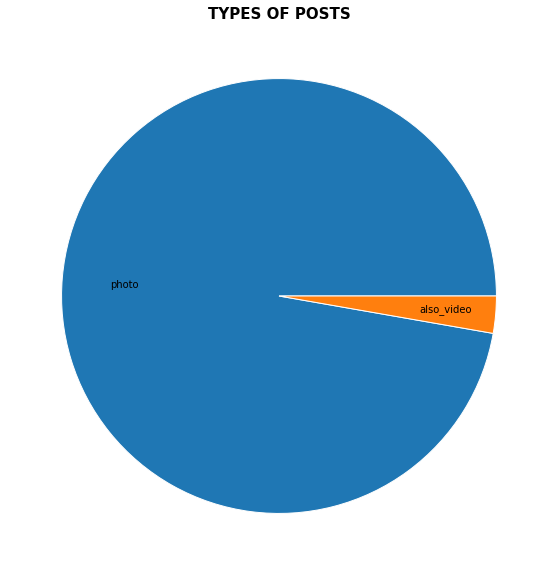

In [25]:
plt.figure(figsize=(15,10))
plt.pie([(types['post_type'] == 1.0).sum(),(types['post_type'] > 1.0).sum()],
        labels = ['photo', 'also_video'],
        labeldistance = .65,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title("TYPES OF POSTS", fontweight='bold', color = 'black', fontsize='15')
plt.show()

#### These graphs show that almost all the posts in the dataset possess only and exclusively photos while those that possess only videos or both(multivariate post types) are a very small part of the total.

## What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage? 

In [26]:
buss_data = prof_data[['profile_name', 'is_business_account']]

In [27]:
buss_data

,profile_name,is_business_account
0,jphillip033,False
1,mama_haas,False
2,yellowlightbreen,False
3,tec1025,NaN
4,luckyfluff,NaN
...,...,...
4509581,karenarkesteyn,False
4509582,jornvlaeminck,NaN
4509583,s_degol,NaN
4509584,anwilms,False


In [28]:
nan_values = buss_data.is_business_account.isna().sum()
print(f"In this dataset there are {nan_values} NaN values that we don't want to consider in our analysis to compute the percentage of business or not business accounts")

In this dataset there are 1064263 NaN values that we don't want to consider in our analysis to compute the percentage of business or not business accounts


#### As we can see, there are many NaN values that don't give us any information if an user has a business or not business account. So we remove them from the dataset to calculate percentages only comparing True and False!!

In [29]:
buss_data.dropna()
perc_is_business = buss_data.is_business_account.value_counts(normalize=True)*100
perc_is_business

False    75.176377
True     24.823623
Name: is_business_account, dtype: float64

#### These are the percentages if an user has a business or not business account.

#### Now we show the comparison from each other with a pie plot.

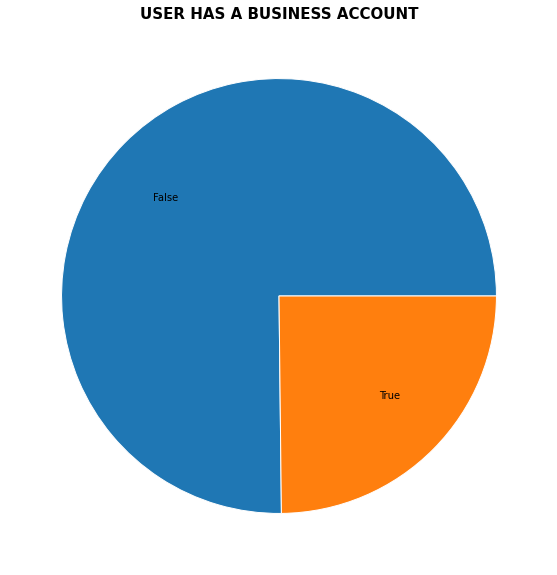

In [30]:
plt.figure(figsize=(15,10))
plt.pie(perc_is_business,
        labels = ['False', 'True'],
        labeldistance = .65,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title("USER HAS A BUSINESS ACCOUNT", fontweight='bold', color = 'black', fontsize='15')
plt.show()

#### From this plot we can notice that in this dataset there are three times as many users who have a non-business accounts as those who do. 

---

# RQ3 
# Posting Times

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
posts = pd.read_csv('data/instagram_posts.csv', sep='\t', usecols=['cts'], parse_dates=['cts'])
posts = posts.dropna()

## What is the most common time in which users publish their posts?
For this problem, we chose to simply count the number of times each post time occurrs in the data set. To simplify things, we only count the hours, as counting unique minutes and seconds would increase the computational complexity without much added gain in the analysis. 

#### 1. Count the number of hours

In [3]:
times, frequencies = most_common_times(posts)

#### 2. Find the time of the maximum number of posts, to be used in the plot

In [4]:
max_time = times[frequencies.index(max(frequencies))]

#### 3. Plot using the plot_date method

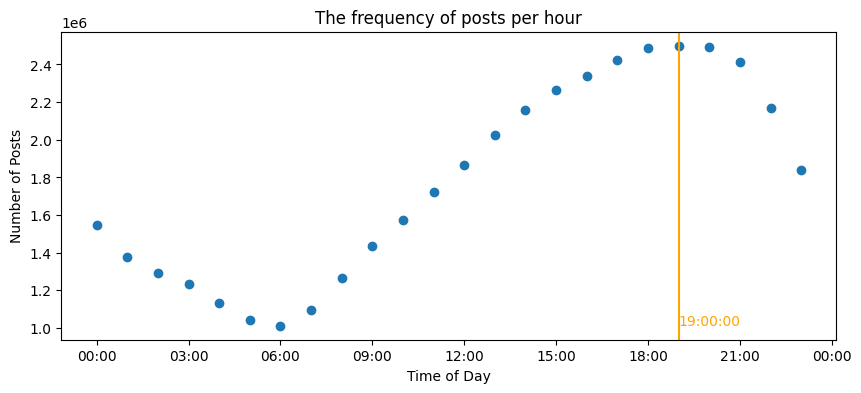

In [5]:
xformatter = mdates.DateFormatter('%H:%M')
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 4)

ax.plot_date(times, frequencies)
ax.xaxis.set_major_formatter(xformatter)
ax.axvline(x = max_time, color = 'orange')
ax.text(x = max_time, y = min(frequencies), s = str(max_time)[11:], color = 'orange')
ax.set_xlabel('Time of Day', fontsize=10);
ax.set_ylabel('Number of Posts', fontsize=10);
ax.set_title('The frequency of posts per hour');

The plots above shows the frequency of posts with a time resolution of hours. From the plot, we can see that most posts are being posted in the evening between 18.00 and midnight. Using an hourly resolution, most posts fall into the interval **19:00 - 20:00**.

We can also see dip in the number of posts between **midnight** and **06:00**, which is expected as most people are sleeping during those hours.

## Plot the number of posts for time intervals
The intervals match what we see in the previous plot about the post frequencies per hour. The peak between **19:00 - 23:00**. we see in the previous plot is represented by the interval **20:00:00 - 23:59:59**.

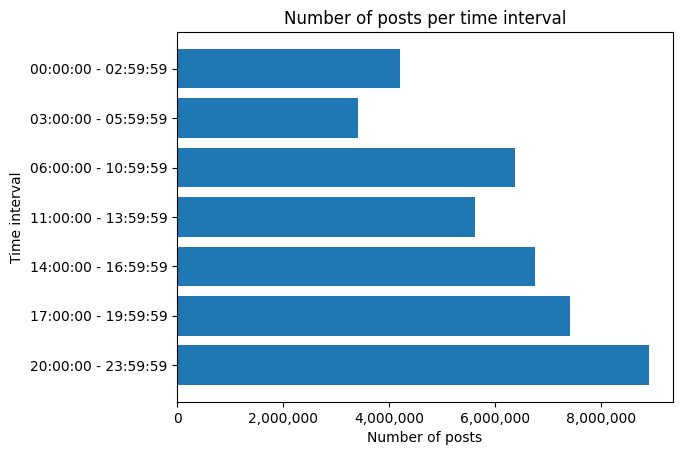

In [6]:
intervals = [("06:00:00", "10:59:59"), ("11:00:00", "13:59:59"), ("14:00:00", "16:59:59"), ("17:00:00", "19:59:59"), ("20:00:00", "23:59:59"), ("00:00:00", "02:59:59"), ("03:00:00",  "05:59:59")]

plot_posts_intervals(posts, intervals);

---

# RQ4 
# In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

## Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

#### First of all we import the columns in which are interested from posts.csv and do a bit of preprocessing, removing NaN values and converting all remain values into integers.

In [2]:
prof_data = dt.fread('instagram_posts.csv', sep='\t', columns={"profile_id", "post_id", "numbr_likes", "number_comments"}).to_pandas()

In [3]:
prof_data = prof_data.dropna()
prof_data[['profile_id', 'numbr_likes', 'number_comments']] = prof_data[['profile_id', 'numbr_likes', 'number_comments']].values.astype('int64')
prof_data

,post_id,profile_id,numbr_likes,number_comments
0,BXdjjUlgcgq,2237947779,80,0
1,BVg0pbolYBC,5579335020,25,1
2,BRgkjcXFp3Q,313429634,9,0
3,BKTKeNhjEA7,1837592700,4,0
4,8-NQrvoYLX,1131527143,8,0
...,...,...,...,...
42710192,BcpWMWGBfxh,5556457201,74,0
42710193,Ba6LZWwlCl8,337186454,49,0
42710194,BPN0kM1hYUw,3289886053,18,0
42710195,BxsZ8nDBr-L,8536366360,27,1


#### Take post and profile id to compare each other and extract the posts belongs to each profile.

In [4]:
prof_post = prof_data[['post_id', 'profile_id']]
prof_post    

,post_id,profile_id
0,BXdjjUlgcgq,2237947779
1,BVg0pbolYBC,5579335020
2,BRgkjcXFp3Q,313429634
3,BKTKeNhjEA7,1837592700
4,8-NQrvoYLX,1131527143
...,...,...
42710192,BcpWMWGBfxh,5556457201
42710193,Ba6LZWwlCl8,337186454
42710194,BPN0kM1hYUw,3289886053
42710195,BxsZ8nDBr-L,8536366360


#### This is the function, given a profile_id from prof_post, returns all posts belongs to that profile_id given in input taking from the dataset above.

In [5]:
def from_prof_to_posts(id_prof):
    return prof_post[prof_post['profile_id'] == id_prof][['profile_id','post_id']]

#### An example with the first profile_id in the dataset we have selected.

In [6]:
from_prof_to_posts(prof_post['profile_id'].loc[0])

,profile_id,post_id
0,2237947779,BXdjjUlgcgq
773482,2237947779,BeyPed5hKj9
2868573,2237947779,Bunhd1DFVAG
2868706,2237947779,Bppi85gliQK
3730200,2237947779,BuDfIyslzfw
29715661,2237947779,BxJsMDpA2yH
29715667,2237947779,Bt5LFpZlm3z
29715668,2237947779,BxZIzaQhS-o
29715669,2237947779,BxRZvS0gPIA
29715769,2237947779,BwygkNCAShv


## Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.


#### Now we take data from profiles.csv and we are looking for only profiles which are in the previous dataset extracted.

In [7]:
prof_data1 = dt.fread('instagram_profiles.csv', sep='\t', columns={"profile_id", "n_posts"}).to_pandas().dropna()
prof_data1['profile_id'] = prof_data1['profile_id'].astype('int64')
prof_data1   

,profile_id,n_posts
0,4721049632,170.0
1,590583002,2878.0
2,1074146658,431.0
5,145064167,590.0
6,2061867521,753.0
...,...,...
4509578,4038738066,576.0
4509579,184061156,193.0
4509580,4070370466,30.0
4509581,1418322351,497.0


In [8]:
prof_data1 = prof_data1[prof_data1['profile_id'].isin(prof_post['profile_id'])] 
prof_data1

,profile_id,n_posts
0,4721049632,170.0
1,590583002,2878.0
2,1074146658,431.0
5,145064167,590.0
6,2061867521,753.0
...,...,...
4509578,4038738066,576.0
4509579,184061156,193.0
4509580,4070370466,30.0
4509581,1418322351,497.0


#### This is the function, given an integer n, returns the posts that belong to the n top posted profiles.
#### I mean the top n profiles that have posted the highest number of posts.

In [9]:
def post_of_n_posted_prof(n):
    n_top_prof = prof_data1.sort_values("n_posts", ascending=False).head(n)
    top_posts = [from_prof_to_posts(row.profile_id) for row in n_top_prof.itertuples()]
    n_top_posts = pd.concat(top_posts)
    return n_top_posts

#### An example  with n is equal to 2.

In [10]:
post_of_n_posted_prof(2)

,profile_id,post_id
9592952,199664772,Bq3hP3Khp8J
9592953,199664772,Bq3hN53hUsD
9592954,199664772,BCqCe9LypeF
9592955,199664772,20Wu4zypd2
9592956,199664772,BrKq76AhadU
9592957,199664772,Bq_MjFzB_Wt
9592958,199664772,Bq_MiKhhP05
9592959,199664772,BpQ2cmKF-W0
9592960,199664772,3V4OeXypTT
9592961,199664772,BzUmjr2pgni


## What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

#### We take the 10 posted profiles from profiles.csv.

In [11]:
top_profiles = prof_data1.sort_values("n_posts", ascending=False).head(10)
top_profiles

,profile_id,n_posts
3990313,199664772,183730.0
2571453,8563366588,142428.0
4338921,1273455368,126340.0
3942129,9813508,125220.0
4219642,1607309412,117262.0
2207897,1087613619,117099.0
4313908,1603889832,113780.0
4219476,218172998,113182.0
4236057,285549744,112777.0
4219551,1701679225,112260.0


#### At this point we can merge this 10 top profiles with the first dataset which is imported to calculate average number of likes and comments for these profiles.

In [12]:
ten_prof_post = prof_data.merge(top_profiles, on="profile_id")
ten_prof_post[['profile_id', 'numbr_likes', 'number_comments', 'n_posts']] = ten_prof_post[['profile_id', 'numbr_likes', 'number_comments', 'n_posts']].astype('int64')
ten_prof_post

,post_id,profile_id,numbr_likes,number_comments,n_posts
0,BxthV3ShVom,1701679225,0,0,112260
1,ByAFy4jhV31,1701679225,4,0,112260
2,BxtZ9NQhF5Q,1701679225,2,0,112260
3,Bxmcoaxh-2v,1701679225,0,0,112260
4,ByPOff-Bgrt,1701679225,1,0,112260
...,...,...,...,...,...
427,BxJp6dVJvtO,8563366588,0,0,142428
428,BxJposzpeA7,8563366588,0,0,142428
429,BxJpmohpwK2,8563366588,0,0,142428
430,BxJpkrrJ0b3,8563366588,0,0,142428


In [13]:
ten_prof_post = ten_prof_post.sort_values("n_posts", ascending=False)
ten_prof_post

,post_id,profile_id,numbr_likes,number_comments,n_posts
309,BCqCe9LypeF,199664772,27,0,183730
317,BzUmictJSO1,199664772,6,0,183730
325,BzScUjhJiwK,199664772,17,0,183730
324,BzUmcZRpTTn,199664772,3,0,183730
323,BzUmdnupYxW,199664772,3,0,183730
...,...,...,...,...,...
41,ByAd5B5BdDP,1701679225,2,0,112260
42,BxzqYeRB8Re,1701679225,6,0,112260
43,ByKAGjThGMv,1701679225,1,0,112260
44,Bvk-3r5hFxJ,1701679225,0,0,112260


#### We  use .groupby  and .mean commands on profile_id to receive in output a DataFrame with average values of likes and comments!  

In [14]:
print(f" This is the DataFrame containing the average values of likes and comments of the ten profiles with the most posts: ")
avg_data = ten_prof_post.groupby('profile_id').mean().sort_values("n_posts", ascending=False)
avg_data[['numbr_likes', 'number_comments']] = round(avg_data[['numbr_likes', 'number_comments']], 3)
avg_data

 This is the DataFrame containing the average values of likes and comments of the ten profiles with the most posts: 


,numbr_likes,number_comments,n_posts
profile_id,,,
199664772,7.667,0.000,183730.0
8563366588,0.000,0.000,142428.0
1273455368,2.960,0.040,126340.0
9813508,0.296,0.000,125220.0
1607309412,1.541,0.000,117262.0
1087613619,2.026,0.184,117099.0
1603889832,6.478,0.045,113780.0
218172998,0.400,0.040,113182.0
285549744,3.922,0.000,112777.0


## Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

#### In this last request we want to search what posts have sent on Instagram by this top 10 profiles in the given intervals of RQ3, so we have to take 'cts' column from posts.csv and do a bit of preprocessing.

In [15]:
time_data = dt.fread('instagram_posts.csv', sep='\t', columns={'profile_id', 'post_id', 'cts'}).to_pandas().dropna()
time_data

,post_id,profile_id,cts
0,BXdjjUlgcgq,2.237948e+09,2017-08-06 20:06:57
1,BVg0pbolYBC,5.579335e+09,2017-06-19 09:31:16
2,BRgkjcXFp3Q,3.134296e+08,2017-03-11 20:05:03
3,BKTKeNhjEA7,1.837593e+09,2016-09-13 16:27:16
4,8-NQrvoYLX,1.131527e+09,2015-10-18 10:19:27
...,...,...,...
42710192,BcpWMWGBfxh,5.556457e+09,2017-12-13 15:38:04
42710193,Ba6LZWwlCl8,3.371865e+08,2017-10-31 11:28:01
42710194,BPN0kM1hYUw,3.289886e+09,2017-01-13 20:16:37
42710195,BxsZ8nDBr-L,8.536366e+09,2019-05-20 20:07:52


In [16]:
time_data.profile_id = time_data.profile_id.astype('int64')
time_data

,post_id,profile_id,cts
0,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57
1,BVg0pbolYBC,5579335020,2017-06-19 09:31:16
2,BRgkjcXFp3Q,313429634,2017-03-11 20:05:03
3,BKTKeNhjEA7,1837592700,2016-09-13 16:27:16
4,8-NQrvoYLX,1131527143,2015-10-18 10:19:27
...,...,...,...
42710192,BcpWMWGBfxh,5556457201,2017-12-13 15:38:04
42710193,Ba6LZWwlCl8,337186454,2017-10-31 11:28:01
42710194,BPN0kM1hYUw,3289886053,2017-01-13 20:16:37
42710195,BxsZ8nDBr-L,8536366360,2019-05-20 20:07:52


#### We use post_of_n_posted_prof function with n=10 to have all posts belongs to these top 10 posted profiles.

In [18]:
total_post_of_ten = post_of_n_posted_prof(10)
total_post_of_ten

,profile_id,post_id
9592952,199664772,Bq3hP3Khp8J
9592953,199664772,Bq3hN53hUsD
9592954,199664772,BCqCe9LypeF
9592955,199664772,20Wu4zypd2
9592956,199664772,BrKq76AhadU
...,...,...
40437904,1701679225,BxT74jSH25K
40996459,1701679225,BxzVSO6hq2V
41291564,1701679225,BxrFpFzBquO
42357392,1701679225,BxwWhDXh9-v


#### We merge datasets to have all coloumns in which are interested from them.

#### It will be our final_data!

In [19]:
final_data = pd.merge(right = time_data, left = total_post_of_ten, on="post_id")
final_data = final_data.drop('profile_id_y', axis=1)

In [20]:
final_data = final_data.rename(columns={'profile_id_x':'profile_id'})
final_data

,profile_id,post_id,cts
0,199664772,Bq3hP3Khp8J,2018-12-02 03:03:33
1,199664772,Bq3hN53hUsD,2018-12-02 03:03:17
2,199664772,BCqCe9LypeF,2016-03-07 16:28:50
3,199664772,20Wu4zypd2,2015-05-18 11:21:27
4,199664772,BrKq76AhadU,2018-12-09 13:33:47
...,...,...,...
427,1701679225,BxT74jSH25K,2019-05-11 08:03:24
428,1701679225,BxzVSO6hq2V,2019-05-23 06:41:49
429,1701679225,BxrFpFzBquO,2019-05-20 07:51:12
430,1701679225,BxwWhDXh9-v,2019-05-22 08:54:51


#### Intervals of time given in RQ3.

In [21]:
intervals = [("06:00:00", "10:59:59"), ("11:00:00", "13:59:59"), ("14:00:00", "16:59:59"), ("17:00:00", "19:59:59"), ("20:00:00", "23:59:59"), ("00:00:00", "02:59:59"), ("03:00:00",  "05:59:59")]

#### We create the last DataFrame in which we have the number of posts of each profile for each given interval of time using find_posts_between function imported from posts.publishing and concatenating each smaller data refers to a single interval.

In [22]:
all_interval_posts = pd.DataFrame()   #an empty DataFrame

for id_prof in pd.unique(final_data['profile_id']):
    #searching for each profile considering them as uniques(check all rows of the same profile for all profiles)
    for start, end in intervals:
        n_posts = len(find_posts_between(final_data[final_data['profile_id'] == id_prof], start, end)) 
        #number of posts for that given profile in that interval 
        column_names = ['profile_id', 'n_posts', 'interval'] #labels
        data = [[id_prof, n_posts, f"{start} - {end}"]] #values of data extracted
        interval_posts = pd.DataFrame(data = data, columns = column_names) 
        # each "smaller" dataset(I mean for each interval)
        all_interval_posts = pd.concat([interval_posts, all_interval_posts])

all_interval_posts = all_interval_posts.sort_values(by="interval")
all_interval_posts #final DataFrame with intervals in order 

,profile_id,n_posts,interval
0,1701679225,0,00:00:00 - 02:59:59
0,199664772,2,00:00:00 - 02:59:59
0,1087613619,3,00:00:00 - 02:59:59
0,1603889832,1,00:00:00 - 02:59:59
0,8563366588,12,00:00:00 - 02:59:59
...,...,...,...
0,199664772,0,20:00:00 - 23:59:59
0,9813508,8,20:00:00 - 23:59:59
0,1607309412,0,20:00:00 - 23:59:59
0,1087613619,10,20:00:00 - 23:59:59


#### Finally plot all these data to visualize them in a best way  and extract some information from them.

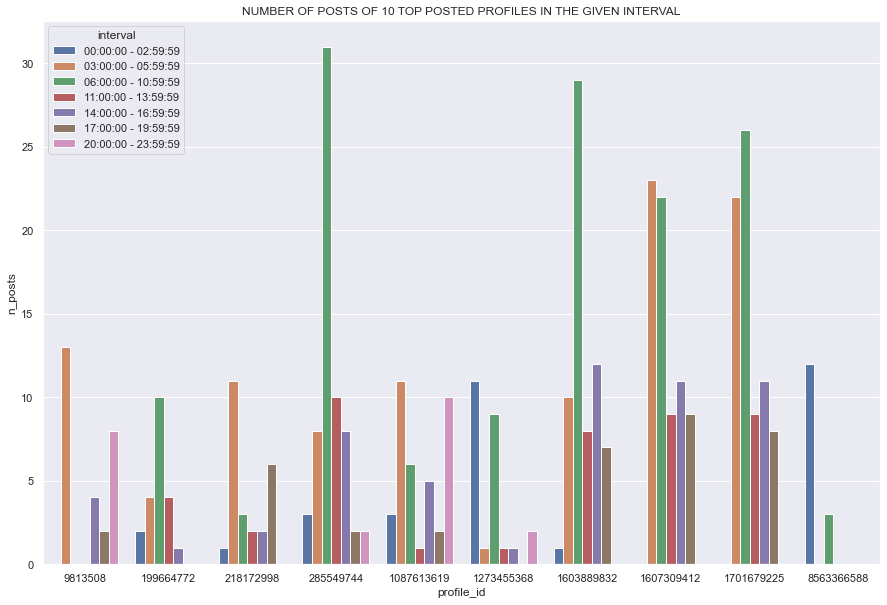

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="profile_id", y="n_posts", hue="interval", data = all_interval_posts, ci=None)
ax.set_title("NUMBER OF POSTS OF 10 TOP POSTED PROFILES IN THE GIVEN INTERVAL")
plt.show()

###### This graph represents the number of posts of the ten profiles with the most posts for each given time interval in the legend at the left corner.

###### As we can see each differently colored bar grouped for each profile represente the posts in that interval.

###### It can be seen that although these are the profiles that made the most posts, the number of posts for each profile during each individual interval and in total during the day is not that high, in fact they are very low values compared to the total number of posts recorded in the dataset.

###### This is due to the fact that in the imported dataset there are not all the posts of each individual profile.

###### In addition, it can be seen that actually, in this dataset, the profile that posted the most ('199664772') is associated with fewer posts than other users, which contradicts the fact that instead it is the user with the most posts. hile the profile with the least number of posts ('1701679225') among the ten profile with the most posts are associated with a high number of posts compared to others.

###### Therefore, although it is a fairly explanatory graph that gives us an idea of how many posts are made in a single day and divided by time intervals, we would have to analyze the entire dataset to get real useful informations.

---

# RQ5
# The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

#### IMPORT DATASETS

In [2]:
profiles=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_profiles.csv").to_pandas()

In [9]:
locations=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_locations.csv").to_pandas()

In [10]:
posts=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_posts.csv", 
               sep="\t", 
               columns={"sid_profile","profile_id","location_id","post_type","numbr_likes","number_comments"}).to_pandas()

#### Plot the top 10 most popular users in terms of followers and their number of posts.

In [11]:
ten_most_inf_user=profiles.sort_values(by=["followers"],ascending=False)
ten_most_inf_user=ten_most_inf_user.head(10)
print(f"The ten most influential users are: {ten_most_inf_user.profile_name.values}")

The ten most influential users are: ['instagram' 'victoriassecret' 'nba' 'louisvuitton' 'buzzfeedtasty'
 'andresiniesta8' 'hm' 'princessyahrini' 'danbilzerian' 'akshaykumar']


<BarContainer object of 10 artists>

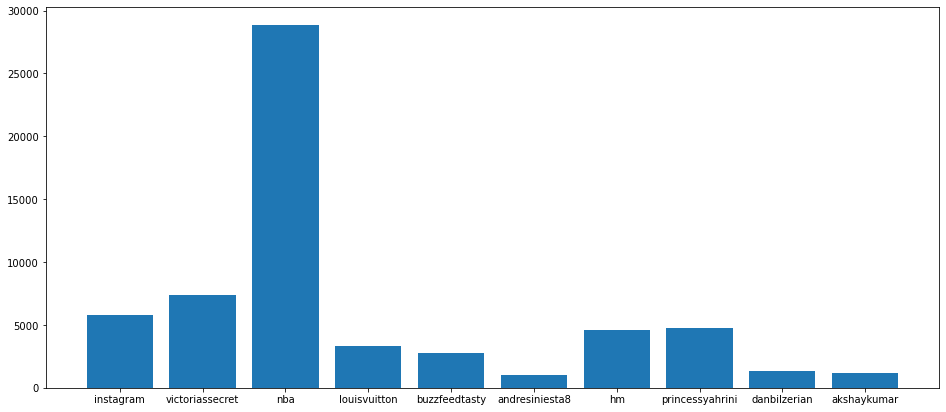

In [12]:
fig, ax = plt.subplots(figsize =(16, 7))
plt.bar(ten_most_inf_user.profile_name,ten_most_inf_user.n_posts)

#### Who is the most influential user?

In [13]:
most_inf_user=profiles.sort_values(by="followers",ascending=False)
most_inf_user=most_inf_user.head(1)
print(f"The most influential user is: {most_inf_user.profile_name.values[0]}")

The most influential user is: instagram


#### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [14]:
post_ten=ten_most_inf_user.merge(posts,on="profile_id")

In [15]:
post_ten_loc=post_ten.merge(locations, left_on="location_id",right_on="id")
post_ten_loc_=post_ten_loc[["profile_id","profile_name",
                           "location_id","name","post_type"]]

#### 
By merging the datasets through the location_id variable we can see that there is a match, so we can say that yes, the ten most influential profiles have posted something with tagged locations. 

In [19]:
# count how many times each locations appears
post_ten_loc_count=post_ten_loc_.name.value_counts()
# consider only locations that appear more than once
post_ten_loc_count_names=post_ten_loc_count[post_ten_loc_count>1]
print(f"The most tagged locations are:\n {post_ten_loc_count_names}")

The most tagged locations are:
 Sydney, Australia              9
Victoria's Secret              4
Kobe-shi, Hyogo, Japan         3
Wells Fargo Center             2
Bel-Air Estate                 2
Bora Bora, French Polynesia    2
Name: name, dtype: int64


In [20]:
top_10_locations = Counter(post_ten_loc.name).most_common(6)
top_10_locations = list(zip(*top_10_locations))
x, y = top_10_locations[0], top_10_locations[1]

<BarContainer object of 6 artists>

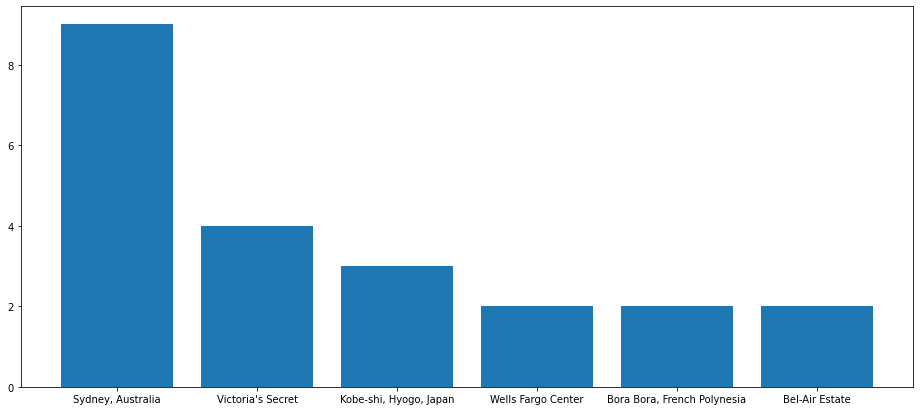

In [21]:
fig, ax = plt.subplots(figsize =(16, 7))
plt.bar(x, y) 

#### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [22]:
post_ten=ten_most_inf_user.merge(posts,on="profile_id")
post_ten

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account,sid_profile,location_id,post_type,numbr_likes,number_comments
0,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,5.332856e+06,1,125428.0,1240.0
1,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,5.873874e+08,1,669786.0,4818.0
2,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,8.770667e+14,1,1914299.0,20065.0
3,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,3.500213e+08,1,840588.0,3627.0
4,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,5.243120e+08,1,385494.0,5664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,241543.0,1152.0
137,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,797506.0,2733.0
138,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,921671.0,9349.0
139,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,1402087.0,16180.0


In [23]:
profile_list=[]

for i in post_ten.profile_name:
    if i not in profile_list:
        profile_list.append(i)
print(profile_list)

['instagram', 'victoriassecret', 'nba', 'louisvuitton', 'buzzfeedtasty', 'andresiniesta8', 'hm', 'princessyahrini', 'danbilzerian', 'akshaykumar']


In [26]:
def count_posts_type (profile_name):
    rows = post_ten[post_ten.profile_name == profile_name]
    
    photo = rows[rows.post_type == 1].post_type.count()
    video = rows[rows.post_type == 2].post_type.count()
    both=rows[rows.post_type == 3].post_type.count()
    tot=photo+video+both
    
    return photo/tot, video/tot, both/tot
    

In [27]:
for i, profile_name in enumerate(profile_list):
    print(profile_list[i],count_posts_type(profile_name))

instagram (0.9117647058823529, 0.08823529411764706, 0.0)
victoriassecret (0.7142857142857143, 0.2857142857142857, 0.0)
nba (0.7222222222222222, 0.2777777777777778, 0.0)
louisvuitton (1.0, 0.0, 0.0)
buzzfeedtasty (1.0, 0.0, 0.0)
andresiniesta8 (1.0, 0.0, 0.0)
hm (1.0, 0.0, 0.0)
princessyahrini (0.8846153846153846, 0.11538461538461539, 0.0)
danbilzerian (1.0, 0.0, 0.0)
akshaykumar (1.0, 0.0, 0.0)


#### 
The first thing we can notice is that for none of the 10 profiles considered were there any posts containing both photos and videos. 
Moreover, for all profiles for which it turns out that 100% of the likes are for posts with only photos, a true interpretation cannot be given because only the type of posts with only photos were recorded, so it is not possible to make a comparison with posts in which there are also videos.
Finally, it can be said that, in general, posts containing only photos receive the most likes.
However, this is not a very true interpretation because if you look at the amount of registered posts divided by type, you realise that most of the registered posts for each profile contain only photos so the comparison is not made on the same conditions. 

#### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [29]:
post_ten_followers_likes=post_ten.groupby(['profile_name',"followers",'post_type'],sort=False)['numbr_likes'].sum()

In [49]:
def avg_likes (profile_name):
    rows = post_ten[post_ten.profile_name == profile_name]
    
    photo = rows[rows.post_type == 1].numbr_likes.sum()
    video = rows[rows.post_type == 2].numbr_likes.sum()
    
    tot=rows.n_posts.sum()
    
    return photo/tot, video/tot

In [53]:
avg_likes_post_type1=[]
avg_likes_post_type2=[]

for profile_name in profile_list:
    a, b = avg_likes(profile_name)
    avg_likes_post_type1.append(a)
    avg_likes_post_type2.append(b)
#print(avg_likes_post_type1,avg_likes_post_type2)

In [54]:
ten_most_inf_user["avg_photo_likes"]=avg_likes_post_type1
ten_most_inf_user["avg_video_likes"]=avg_likes_post_type2

In [57]:
df_new = ten_most_inf_user[['profile_name', 'followers', "n_posts", "avg_photo_likes","avg_video_likes"]]

In [58]:
df_new

,profile_name,followers,n_posts,avg_photo_likes,avg_video_likes
2880218,instagram,285457645.0,5760.0,143.402456,9.090222
2582507,victoriassecret,65269440.0,7355.0,22.409420,10.154725
3820939,nba,35339708.0,28816.0,6.071210,1.998269
701965,louisvuitton,30689316.0,3352.0,55.744928,0.000000
2414951,buzzfeedtasty,30246783.0,2791.0,36.138632,0.000000
2785241,andresiniesta8,29542143.0,990.0,477.800673,0.000000
333193,hm,29176804.0,4566.0,17.786575,0.000000
3934581,princessyahrini,29042823.0,4719.0,26.595327,1.021166
1311970,danbilzerian,26476004.0,1311.0,658.362522,0.000000
1703764,akshaykumar,26252169.0,1173.0,875.619647,0.000000


#### 
As in the previous question, it must be taken into account that for some profiles posts containing videos were not recorded and that the number of posts containing videos recorded is less than those containing photos, so the comparison is not entirely true. 
However, if we were to compare the average number of likes per photo against the number of followers, what we deduce is that the 'active' followers of each profile are very few compared to the actual followers following each account. 
This is particularly evident for the NBA profile and the HM profile, but also for Louis Vuitton, Buzz Feed Tasty and Princess Yahrini. 

---

# RQ6 
# Posting Effectiveness

For this question, we need to consider two datasets:
* instagram_profiles
* instagram_posts

## Finding the average time a user lets pass
To find the average time a user lets pass before posting another post, one can do the following:
1. Get all profiles from the profiles dataset.
2. For each profile, find the maximum and minimum post time in the posts dataset.
3. Find the average by subtracting the minimum post time from the maximum post time and dividing by the number of posts the profile has.
4. Take the average of all post frequency averages.

### Caveats:
* Not all profiles that appear in the profiles dataset also appear in the posts dataset (even if they have posts). Since we care about finding the average time, a user MUST exist in the posts dataset for the analysis to be conclusive.
* The number of posts for each profile shown in the profiles dataset is unreliable, meaning that it doesn't mean that all those posts will be found in the posts dataset.

### Choices:
* Only consider users that appear in both posts and profiles dataset.
* Remove posts that don't have a post time.

### Approach
The profiles dataset has over 4 million rows and posts dataset has over 40 million rows. Finding all of the rows that belong to each user using pandas queries is very expensive, as all 40 million rows need to be scanned for each profile in the profiles dataset. 

Instead of relying on querying, the rows belonging to each user are retrieved using indexing instead which is an O(1) operation.

## Cleaning profiles dataset
To find the posts for each profile, we need to first need to make sure that profiles contains no duplicates and nulls.

In [109]:
profiles = pd.read_csv('data/instagram_profiles.csv', sep='\t', usecols=['profile_id', 'profile_name', 'n_posts', 'following', 'followers'])
profiles = profiles[profiles.profile_id.notnull()]
profiles.profile_id = profiles.profile_id.astype('Int64')
profiles = profiles.drop_duplicates(subset='profile_id', keep="last")
profiles = profiles.sort_values(by='profile_id')

## Cleaning posts dataset
We only want posts that are associated with profiles in the profiles dataset, so will remove nulls and only keep rows where the profile_id exists in the profiles dataset.

In [110]:
posts = pd.read_csv('data/instagram_posts.csv', sep='\t', usecols=['profile_id', 'cts', 'numbr_likes', 'number_comments'], parse_dates=['cts'], index_col=False)

In [111]:
profile_time = posts[['profile_id', 'cts']]

In [112]:
filtered_posts = profile_time.dropna()
filtered_posts = filtered_posts[filtered_posts.profile_id.isin(profiles.profile_id)]
sorted_posts = filtered_posts.sort_values(by='profile_id')
profiles_with_posts = profiles[profiles.profile_id.isin(sorted_posts.profile_id.unique())]
profiles_with_posts['true_n_posts'] = sorted_posts.groupby('profile_id')['profile_id'].count().values

In [113]:
sorted_post_times = sorted_posts.cts.values

In [114]:
# Find the indeces that will be used for finding posts
profiles_with_posts['start_index'] = profiles_with_posts.true_n_posts.shift(1).cumsum().astype('Int64')
profiles_with_posts.iloc[0, -1] = 0

In [115]:
def find_max_min_time_stamps(profile_id, n_posts, start_index):
    """Finds the max and minimum post times in the sorted_post_times dataframe."""
    start_index = int(start_index)
    n_posts = int(n_posts)
    profile_post_times = sorted_post_times[start_index:start_index + n_posts]
    
    min_post_time = profile_post_times.min()
    max_post_time = profile_post_times.max()
  
    return max_post_time, min_post_time

In [116]:
max_post, min_post = np.vectorize(find_max_min_time_stamps)(profiles_with_posts.profile_id, profiles_with_posts.true_n_posts, profiles_with_posts.start_index)

In [117]:
profiles_with_posts['max_post'] = max_post
profiles_with_posts['min_post'] = min_post

In [118]:
profiles_with_posts['post_time_delta'] = profiles_with_posts.max_post - profiles_with_posts.min_post
profiles_with_posts['avg_post_delta'] = profiles_with_posts.post_time_delta / (profiles_with_posts.true_n_posts - 1)

### What is the average time (days and minutes) a user lets pass before publishing another post?

#### How to answer this question
1. Get all profiles from the `profiles.csv` dataset. 
2. For each profile, find the maximum and minimum post time in the `posts.csv` dataset.
3. Find the average by subtracting the minimum post time from the maximum post time and dividing by the number of posts the profile has.
4. Take the average of all post frequency averages.

The answer to this question is somewhat distorted by people who have either posted 0 or 1 posts. In both scenarios, the average post time will be 0, which doesn't contribute to increasing the cumulative average post time of all users.

Hence, users with 0 or 1 posts reduce the overall average post time.

In [119]:
avg_post_delta = profiles_with_posts.avg_post_delta.mean()
days = avg_post_delta.days
hours = round(avg_post_delta.total_seconds() // 3600  - days * 24)
minutes = round((avg_post_delta.total_seconds() % 3600) // 60)

In [120]:
print(f"The average time for a user lets pass before publishing another post, taking into account users who were found to have posted, is\n{days} days, {hours} hours, {minutes} minutes.")

The average time for a user lets pass before publishing another post, taking into account users who were found to have posted, is
30 days, 2 hours, 7 minutes.


### Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

Plotting the top 3 users that publish posts more frequently does not provided any valuable insights. There are a number of users with more that posted multiple posts at the same time and therefore have a post frequency of 0. For that reason, the post frequency dimension does not make a difference in the plot.

By plotting the average time that passes between posts, the number of followers, and the number of following, for **all users**, we can more easily see whether there is a pattern.

In [121]:
filtered_profiles = profiles_with_posts[profiles_with_posts.true_n_posts > 1]

In [122]:
top_3 = profiles_with_posts.sort_values(by='avg_post_delta').head(3)

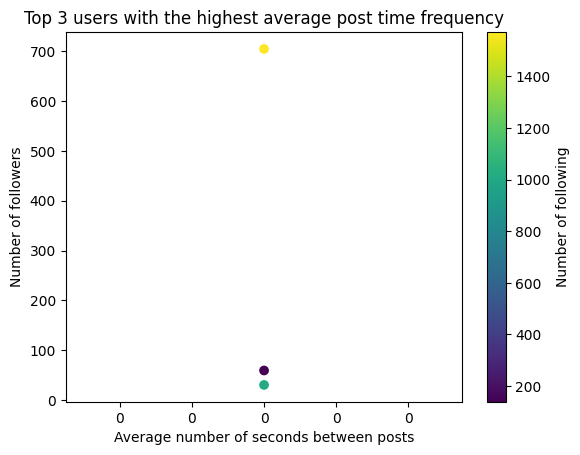

In [123]:
plt.scatter(top_3.avg_post_delta.dt.total_seconds(), top_3.followers, c=top_3.following)
plt.title('Top 3 users with the highest average post time frequency')
plt.xlabel('Average number of seconds between posts')
plt.ylabel('Number of followers')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.colorbar(label='Number of following');

In [124]:
seconds = filtered_profiles.avg_post_delta.dt.total_seconds()
followers = filtered_profiles.followers
following = filtered_profiles.following

#### Plotting all users
The plot below shows the average time between posts, number of followers, and number of following for all users that have posts in the `posts` dataset.

From the plot, we can see that users that have more than 1,000 followers, wait an average time of more than 10,000 seconds (2h 45 minutes) before making another post.

We can also see that users with fewer followers, also generally follow fewer other profiles, as indicated by the darker blue regions at the bottom of the plot.

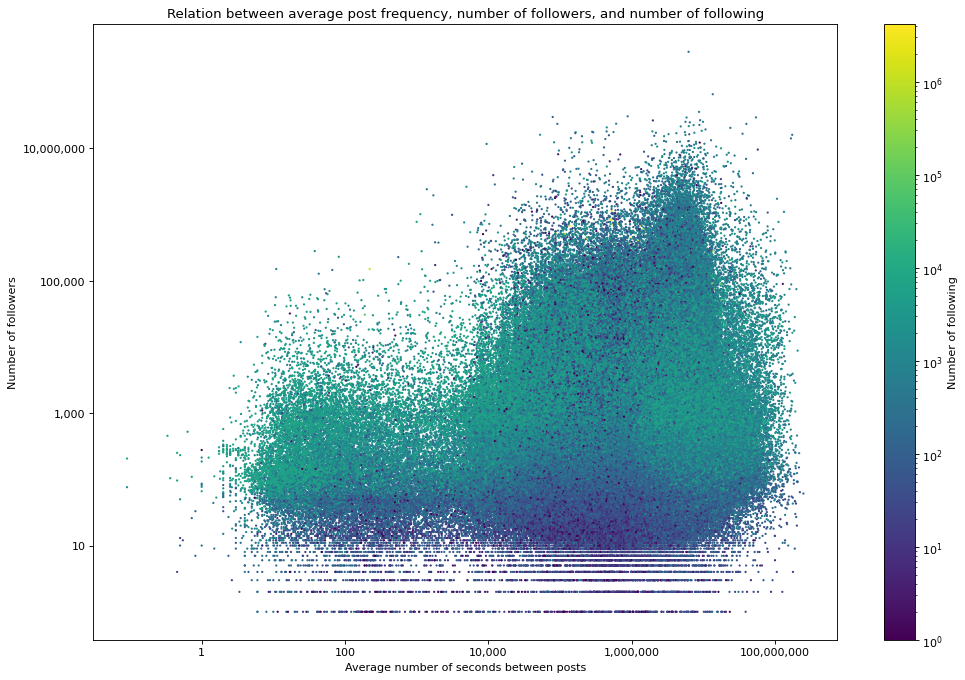

In [125]:
plt.figure(figsize=(15, 10), dpi=80)

plt.scatter(seconds, followers, c=following, norm=LogNorm(), s=1)
plt.yscale('log')
plt.xscale('log')
plt.title('Relation between average post frequency, number of followers, and number of following')
plt.xlabel('Average number of seconds between posts')
plt.ylabel('Number of followers')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.colorbar(label='Number of following');

### Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

For this we need to grab a subset from the already fetched posts dataset, with the following columns:
* post time (`cts`)
* number of likes (`numbr_likes`)
* number of comments (`number_comments`)

from the posts dataset.

In [126]:
time_likes_comments = posts[['cts', 'numbr_likes', 'number_comments']]

### Find the average number of likes and comments

In [127]:
intervals = [("06:00:00", "10:59:59"), ("11:00:00", "13:59:59"), ("14:00:00", "16:59:59"), ("17:00:00", "19:59:59"), ("20:00:00", "23:59:59"), ("00:00:00", "02:59:59"), ("03:00:00",  "05:59:59")]
intervals.sort()

In [128]:
likes = []
comments = []
for start, end in intervals:
    found_posts = find_posts_between(posts, start, end)
    
    n_posts = found_posts.shape[0]
    
    avg_likes = found_posts.numbr_likes.sum() / n_posts
    avg_comments = found_posts.number_comments.sum() / n_posts
    likes.append(round(avg_likes))
    comments.append(round(avg_comments))

In [129]:
interval_labels = list(map(lambda start_end: f"{start_end[0]} - {start_end[1]}", intervals))

### Plot the likes and comments
Since this plot will have two bars for each interval, the function from RQ3 is **not** reused.

The average number of likes and comments is evenly distributed across all time intervals. The average tells us that irregardless of when a post is being posted, users on average will like and comment on the same number of posts. Likes and comments are rounded to the nearest integer.

Just by looking at the average however, one cannot say how likes and comments are distributed. 

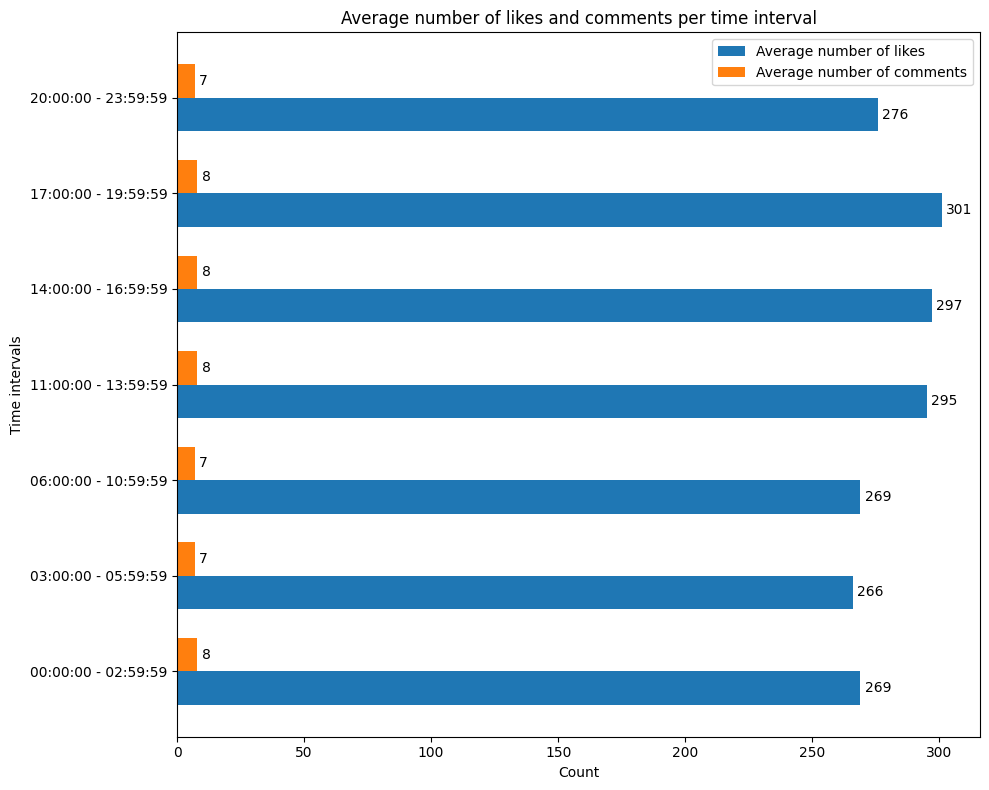

In [130]:
label_locations = np.arange(len(interval_labels))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

bar_likes = ax.barh(label_locations - bar_width/2, likes, bar_width, label='Average number of likes')
bar_comments = ax.barh(label_locations + bar_width/2, comments, bar_width, label='Average number of comments')

ax.set_ylabel('Time intervals')
ax.set_yticks(label_locations, interval_labels)

ax.set_xlabel('Count')
ax.set_title('Average number of likes and comments per time interval')
ax.legend()

ax.bar_label(bar_likes, padding=3)
ax.bar_label(bar_comments, padding=3)

fig.tight_layout()

-plt.show()

---

# RQ7
# Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

- ## What's the probability that a posts receives more than 20% "likes" of the number of followers a user has?

#### We've to compare the number of likes and number of followers for each user to compute this probability, so we create a new DataFrame with these columns in which we are interested.

#### First DataFrame from "instagram_profiles.csv" in which we have removed NaN values because they don't give us informations and converted follower's number to an integer for each user.

In [2]:
from_prof = dt.fread('instagram_profiles.csv', sep='\t', columns={"sid", "followers"}).to_pandas()

In [3]:
from_prof = from_prof.dropna()

In [4]:
from_prof['followers'] = from_prof['followers'].astype(int)
from_prof

,sid,followers
0,4184446,146
1,4184457,1145
2,4184460,324
5,4184465,192
6,4184471,4137
...,...,...
4509578,4184455,809
4509579,4184458,599
4509580,4184463,261
4509581,4184467,481


#### Now we want the second DataFrame from "instagram_posts.csv" to merge it with the first one including "sid_profile"(sequence ID of the profile from Profiles) to manage to connect and compare likes and comments in order.

In [5]:
from_post = dt.fread('instagram_posts.csv', sep='\t', columns={"sid_profile", "numbr_likes"}).to_pandas()

#### At first we clean dataset by values in which we aren't interested(sid_profile values equal to '-1' don't have any sense).

In [6]:
from_post = from_post[['sid_profile', 'numbr_likes']][from_post['sid_profile'] != -1].dropna()
from_post

,sid_profile,numbr_likes
0,3496776,80.0
10,3303402,114.0
26,3406435,46.0
29,3529017,66.0
52,3206132,1983.0
...,...,...
42710181,3496776,107.0
42710182,3496776,69.0
42710183,3496776,133.0
42710188,1421602,322.0


#### Converting into int values

In [7]:
from_post['numbr_likes'] = from_post['numbr_likes'].astype(int)
from_post

,sid_profile,numbr_likes
0,3496776,80
10,3303402,114
26,3406435,46
29,3529017,66
52,3206132,1983
...,...,...
42710181,3496776,107
42710182,3496776,69
42710183,3496776,133
42710188,1421602,322


#### Now we  can merge the dataframes to calculate the probability!... we notice that there are less rows cause of mismatching of two columns 'sid' and 'sid_profile' from the two different datasets.

In [8]:
df_probs = pd.merge(from_post, from_prof, left_on = 'sid_profile', right_on = 'sid').drop('sid', axis = 1)
df_probs

,sid_profile,numbr_likes,followers
0,3496776,80,1204
1,3496776,86,1204
2,3496776,168,1204
3,3496776,102,1204
4,3496776,145,1204
...,...,...,...
27134177,1355462,125,1066
27134178,1451349,117,377
27134179,3500677,147,866
27134180,1788260,58,475


#### We have to do two checks.

#### The first one is about when the number of followers is equal to zero and an user has at least one like in  his posts.

In [9]:
check = ((df_probs['followers'] == 0) & (df_probs['numbr_likes'] > 0)).sum()
check

2276

#### Now we delete rows where the number of followers is equal to zero to can do the second check.  

In [10]:
df_probs = df_probs[df_probs['followers'] != 0]
df_probs

,sid_profile,numbr_likes,followers
0,3496776,80,1204
1,3496776,86,1204
2,3496776,168,1204
3,3496776,102,1204
4,3496776,145,1204
...,...,...,...
27134177,1355462,125,1066
27134178,1451349,117,377
27134179,3500677,147,866
27134180,1788260,58,475


#### Second check is about when number of likes is more than 20% of the number of followers that are now all different from zero. So we pick the two columns of our interest and do three steps:

1. Create a new column **likes_followers_ratio** in which we have values from ratio between **numbr_likes** and **followers**
1. Pick only the values that are > 0.2 
1. Count how many these values are 

#### They will be our possible cases for the probability we have to calculate

In [11]:
check2 = df_probs[['numbr_likes', 'followers']]
check2["likes_followers_ratio"] = check2.numbr_likes / check2.followers
check2 = check2[check2.likes_followers_ratio > 0.2].likes_followers_ratio.count()
check2

4131855

#### At this point we have all informations to compute the probability requested and we show it.

In [12]:
print(f" The probability that a post receives more than 20% likes of the number of followers a user has is: {round((check + check2) / df_probs.shape[0], 5)}, so the percentage is {round((((check + check2) / df_probs.shape[0])*100), 3)}%")

 The probability that a post receives more than 20% likes of the number of followers a user has is: 0.15238, so the percentage is 15.238%


## Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

#### Take columns in which we are interested and do a bit of preprocessing, removing NaN values and converting the columns into int values.

In [13]:
prof_loc = dt.fread('instagram_posts.csv', sep='\t', columns={"profile_id", "location_id"}).to_pandas()
prof_loc

,profile_id,location_id
0,2.237948e+09,1.022366e+15
1,5.579335e+09,4.574268e+14
2,3.134296e+08,4.574268e+14
3,1.837593e+09,4.574268e+14
4,1.131527e+09,4.574268e+14
...,...,...
42710192,5.556457e+09,4.574268e+14
42710193,3.371865e+08,4.574268e+14
42710194,3.289886e+09,4.574268e+14
42710195,8.536366e+09,4.267235e+06


In [14]:
prof_loc = prof_loc.dropna().astype('int64')
prof_loc 

,profile_id,location_id
0,2237947779,1022366247837915
1,5579335020,457426771112991
2,313429634,457426771112991
3,1837592700,457426771112991
4,1131527143,457426771112991
...,...,...
42710192,5556457201,457426771112991
42710193,337186454,457426771112991
42710194,3289886053,457426771112991
42710195,8536366360,4267235


#### Remove rows that are not duplicated because we want to analize only users return to a site!

In [15]:
prof_loc_dup = prof_loc[prof_loc.duplicated(subset=["profile_id", "location_id"], keep=False)]
prof_loc_dup

,profile_id,location_id
0,2237947779,1022366247837915
15,176274494,282618748
17,8492416500,130379727582083
21,8492416500,130379727582083
25,8492416500,130379727582083
...,...,...
42710179,2237947779,1022366247837915
42710180,2237947779,1022366247837915
42710181,2237947779,1022366247837915
42710182,2237947779,1022366247837915


#### We count how many rows are in the dataset above in which we remove duplicates to take all users in which we are interested only once(all possible cases of the probability). 

In [16]:
numbr_dup = prof_loc_dup.drop_duplicates(subset=["profile_id", "location_id"]).shape[0]
numbr_dup

2962104

#### Calculate probability requested dividing for all total cases(n groups from the data we have), so all profiles counted once. 

In [17]:
prob = numbr_dup / prof_loc.groupby(["profile_id", "location_id"]).ngroups

In [18]:
print(f" The probability that a user returns to a site after having posted it in the past is: {round(prob*100, 2)}%")

 The probability that a user returns to a site after having posted it in the past is: 14.04%


### Comments about this probability

This probability does not make much sense since if a user posts on Instagram withe the location tag it is not certain that he or she has returned to that location. Let me explain further.  For example, a user might have been in that site and not post anything at that time and instead post more posts with that location once he or she returned home. Or post multiple posts on different days, even a long time apart, and have only been to that location once!!

Nevertheless, this probability gives us a very rough idea of how much people used to return to those places or sites, or even better, how muche they like to show that they visit the same place many times or that they have visited various parts of that place even though in reality they may have been in it only once in their lives and maybe even for a short time.

We can say that it turns out to be interesting to find this out but for the purpose of getting very relevant information its quite useless and we should go into much more detail!!

---

# RQ8
# Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

In [2]:
profiles=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_profiles.csv").to_pandas()

In [3]:
locations=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_locations.csv").to_pandas()

In [4]:
posts=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_posts.csv", 
               sep="\t", 
               columns={"profile_id","location_id","post_type","numbr_likes","number_comments","cts"}).to_pandas()

In [5]:
likes=posts.numbr_likes.dropna()
comments=posts.number_comments.dropna()

#### Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

Let's see if there's a linear relationship between the two considered variables 

In [6]:
likes.corr(comments, method = "pearson")

0.3744527992482448

Assuming a linear relationship between the variables "number of likes" and "number of posts", we calculate the linear pearson correlation coefficient, which has a value of 0.374. This means that the (linear) relationship between the variables is rather low, so it cannot be said that a higher number of likes means a higher number of comments. 

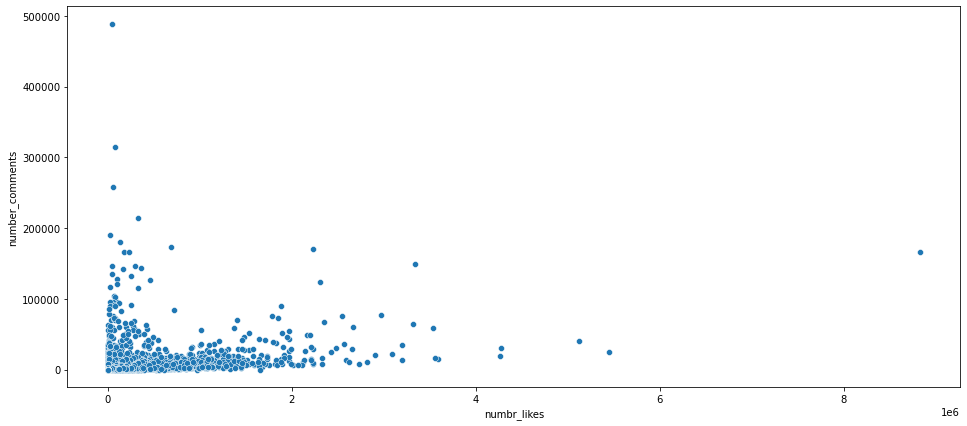

In [137]:
fig, ax = plt.subplots(figsize =(16, 7))
sns.scatterplot(x=likes,y=comments)
plt.show()

The intuition gained from analysing the linear relationship between the two variables is confirmed by looking at the scatterplot.
In fact, if a greater number of likes implied a greater number of comments, the cloud of points should follow an increasing trend along the bisector of the plane (in the case of positive correlation) or a descending trend perpendicular to the bisector of the plane (in the case of negative correlation). 

#### Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

Since the dataset has a fairly large number of outliers, we will use the median, which is a robust estimator with respect to outliers, to compare the distributions.

In [8]:
intervals = [("06:00:00", "10:59:59"), ("11:00:00", "13:59:59"), ("14:00:00", "16:59:59"), ("17:00:00", "19:59:59"), ("20:00:00", "23:59:59"), ("00:00:00", "02:59:59"), ("03:00:00",  "05:59:59")]
interval_labels = list(map(lambda interval : f"{interval[0]} - {interval[1]}", intervals))

In [9]:
# I created a dictionary in which I put the different intervals as keys 
my_dict_likes=dict.fromkeys(intervals)

In [10]:
# I assign for each key ( i mean for each interval) the number of likes
for interval in intervals:
    start, end = interval
    found = find_posts_between(posts, start, end)
    sum_likes=found.numbr_likes.values + 1    
    my_dict_likes[interval] = (sum_likes)

In [31]:
# I created a list in which I put the logarithm of the number of likes for each post. 
# I will need this for the graphical representation: a graphical representation made using the 
# logarithm is more readable.
y_likes = []
for value in my_dict_likes.values():
    value = np.log(value)
    y_likes.append(value)

In [49]:
# I compute the median
median_likes=np.median(posts.numbr_likes.dropna())

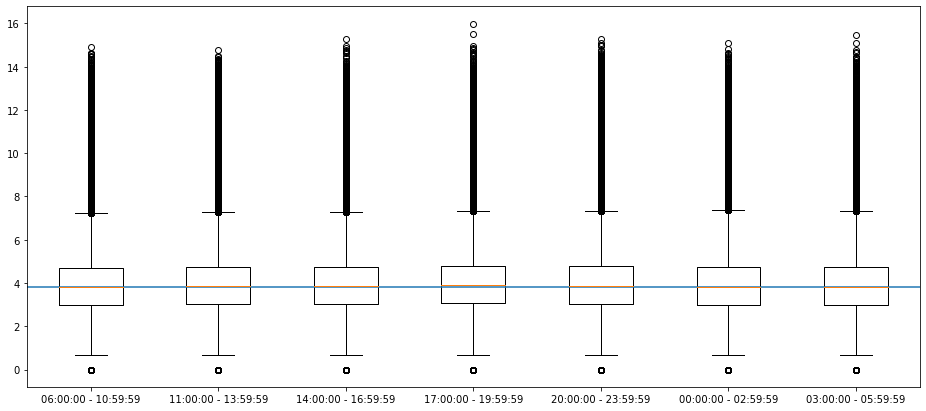

In [50]:
fig, ax = plt.subplots(figsize =(16, 7))
plt.boxplot(y_likes, labels=interval_labels)
plt.axhline(y=np.log(median_likes)) # This is the median of the entire distribution
plt.show()

In [ ]:
# Now the problem is: how is it possible that the median value of likes for different time slots 
# is always the same?
# How is it possible that posts published at night have the same number of likes as those published 
# during the day? It doesn't make sense.
# There were two things I thought of:
# 1) despite the logarithm, however, the values are too large to be correctly interpreted so the 
# distribution would be rescaled to make the boxplots even less 'compressed'
# 2) only one time zone was considered for all posts, even if posted in different countries.
# I mean, if for example only the American time zone was considered, a post put up at 11 a.m. in Italy
# was recorded as being put up at 2 a.m. in America. 
# So considering the time zones of all the countries of the world, the number of likes per post is
# the same even in the strangest time slots, like 3am to 6am. 

In [40]:
# now I do all the same for number of comments.
my_dict_comments=dict.fromkeys(intervals)

In [21]:
#I assign for each key=interval the number of comments  
for interval in intervals:
    start, end = interval
    found = find_posts_between(posts, start, end)
    sum_comments=found.number_comments.values + 1    
    my_dict_comments[interval] = (sum_comments)
    

In [22]:
y_comments = []
for value in my_dict_comments.values():
    value = np.log(value)
    y_comments.append(value)

In [42]:
median_comments=np.median(posts.number_comments.dropna())

0.6931471805599453

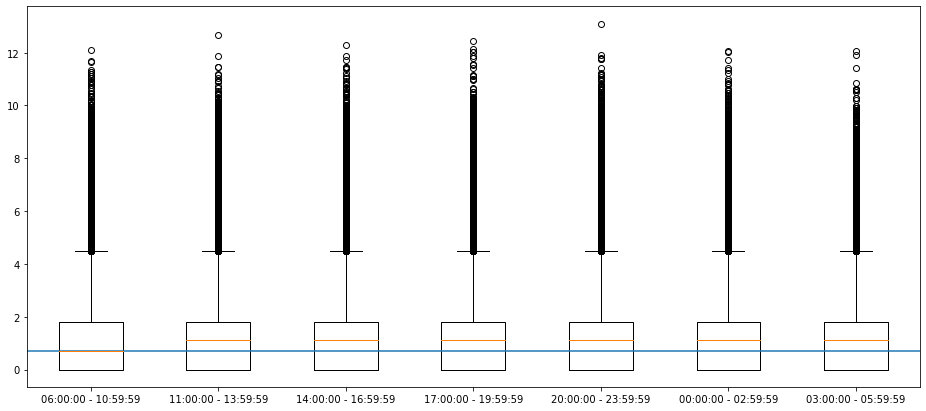

In [39]:
fig, ax = plt.subplots(figsize =(16, 7))
plt.boxplot(y_comments, labels=interval_labels)
plt.axhline(y=np.log(median_comments))
plt.show()

In [ ]:
# How is it possible that the number of comments per post in time slots is ALWAYS 
# greater than the overall number of comments?

#### What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [12]:
followers=profiles.followers.dropna()

To make the graph more interpretable, let us rescale the distribution on a logarithmic scale.
Having a number of profiles with zero followers, before doing the logarithm we increase all the units by 1 so as not to have any problems in calculating the logarithm. 

In [10]:
followers_=followers.apply(lambda x: x+1)

In [8]:
distr_followers=followers_.apply(np.log)

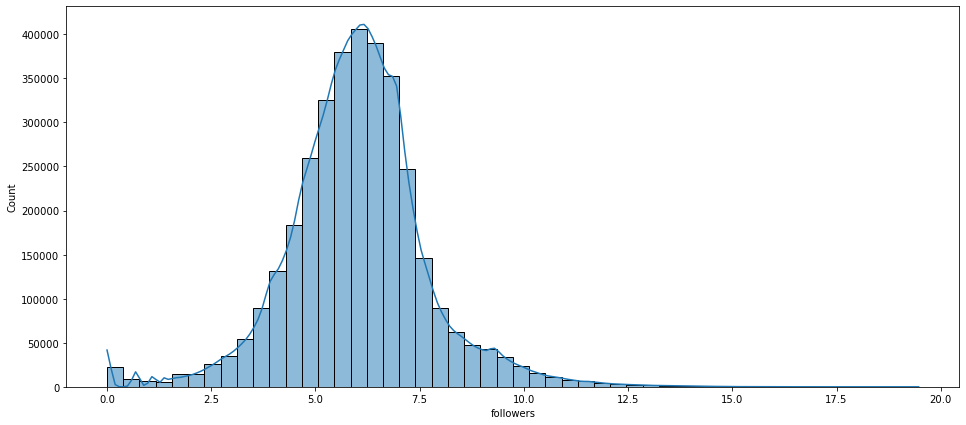

In [9]:
fig, ax = plt.subplots(figsize =(16, 7))
sns.histplot(distr_followers,bins=50,kde=True)
plt.show()

In [22]:
followers_mean=np.mean(followers)
followers_mode=statistics.mode(followers)
first_quantile=np.quantile(followers,0.25)
third_quantile=np.quantile(followers,0.75)
print("On average, each profile has",int(np.round(followers_mean)),"followers.")
print("\n")
print(f"The mode of the distribution, i.e. the value that appears most often in the dataset, is: {int(followers_mode)}. Applying the \nvalue_counts function, it can be seen that more than 22 thousand users with zero followers are \nregistered in the profile dataset: this explains why the modal value is zero.")
print("\n")
print("The first quartile of the distribution is:",first_quantile)
print("The third quartile of the distribution is:",third_quantile)

On average, each profile has 4740 followers.


The mode of the distribution, i.e. the value that appears most often in the dataset, is: 0. Applying the 
value_counts function, it can be seen that more than 22 thousand users with zero followers are 
registered in the profile dataset: this explains why the modal value is zero.


The first quartile of the distribution is: 159.0
The third quartile of the distribution is: 974.0


In [ ]:
# I don't know if these outputs have to be commented.. 
# I wouldn't even know what to say... explain better what the quantiles are?

#### What are histograms, bar plots, scatterplots and pie charts used for?
- A histogram is a graphical representation used to visualise the (approximate) distribution of a numerical variable. 
To construct a histogram, the range of values taken by the variable is subdivided into classes: for each class, a rectangle is constructed with a base equal to the width of the class and a height equal to the number of observations that fall within that class.
- A barplot is use to show the relationship between a numeric and a categorical variable. Each value taken by the categorical variable is represented by a bar while the height of the bar represents its numerical value. 
- The scatter plot makes it possible to visualise the relationship between two quantitative variables. 
In this type of graph, the two variables are plotted on a Cartesian space: the values of one variable are shown on the horizontal x-axis, while the values of the other variable are represented on the vertical y-axis.
Each statistical unit is represented by a point positioned on the graph according to its coordinates. So this graph will consist of as many points as there are statistical units under study. 
- A pie chart shows the relationship between parts and an integer for a variable. Basically, it is a circumference divided into areas and each area represents the count or percentage of observations at one level for the variable.
They are used for nominal or categorical data.

#### What insights can you extract from a Box Plot?
Box plots provide a quick summary of the variability of values in a data set. They show, reading from bottom to top (or left to right), the minimum, first quartile, median, third quartile and maximum of the distribution.
They also show any outliers in the data set.

---

# AQ1 
What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

```
Input: 
    N : an integer 
    List : array of characters of length N without repetition
    
function f1(sequence, end): 
    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end): 
    If start = end: 
        f1(sequence, end)
    Else
        For i=start To end: 
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            f2(sequence, start+1, end)
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
f2(List, 0, N)
```

---

## What does the algorithm do?
The following algorithm outputs permutations of the characters given as input as a list. A permutation is defined as *each of the several possible ways in which a set or number of things can be ordered or arranged*.

## How does it do it?
The general idea behind recursively creating a permutation of a sequence of characters is that we go through all characters in the sequence, **freeze** a portion of the sequence and permute the remaining characters. 

### f1
In the first function `f1`, we receive as input:
* `sequence`: a sequence of characters. 
* `end`: an integer. 

The function prints all characters in the sequence on separate lines, followed by a final new line at the end.

---

### f2
In the second function `f2`, we the input is:
* `sequence`: a sequence of characters.
* `start`: an integer that specifies the start index of the sequence of characters.
* `end`: an integer that specifies the end index of the sequence of characters.

If the two values `start` and `end` are equal, it means that we have reached the end of a single permutation, and the function `f1` described above is called to print the permuted sequence of characters.

If the value of `start` is different from the value of `end`, we loop over all indeces from `start` to `end`. During each iteration of the loop, we first swap the starting value of the sequence with the `ith` character in the sequence.

E.g. when `start = 0` and `i = 1`, we get `abc` -> `bac`.

We do this because we want to **freeze** a start character in place while permuting the remaining characters in the sequence. Permuting the subsequence is the same as permuting the entire sequence, so we make a recursive call to `f2` with the start value increased by `1`, which will make the for loop operate over a smaller subsequence of the original sequence. We will hit the bottom of the recursion tree when the subsequence is of length 1, at which point `f1` is called and a single character is printed. Once we have exited a recursive call, we again swap the start with the `ith` character in the sequence.

The recursion tree below shows the swapping and freezing of characters in the sequence `ABC`, to create all permutations.

---

![permutation_recursion_tree](docs/permutation_recursion_tree.svg)

---

In [2]:
N = int(input()) # integer
List = list(input()) # array of characters of length N without repetition

def f1(sequence, end): 
    for i in range(0,end):
        print(sequence[i])
    print("\n")
    
    
def f2(sequence, start, end): 
    if start == end: 
        f1(sequence, end)
    else:
        for i in range(start, end): 
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            f2(sequence, start+1, end)
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp

f2(List, 0, N)

3
abc
a
b
c


a
c
b


b
a
c


b
c
a


c
b
a


c
a
b




## Complexity
Per definition, the number of permutations for a set $S$ with $n$ elements is $n!$. To print a single permutation using the recursive algorithm, we need to go down the entire tree until we hit a leaf, which is $n$ operations. Since we need to do this for $n!$ permutations, we have a time complexity of $O(n \times n!) = O(n!)$.

## Is this algorithm the optimal one to produce this output?
Since we always need to compute $n!$ permutations, any algorithm will be bounded by $O(n!)$. There are other algorithms that find all permutations differently but still have the same time complexity, e.g. [Steinhaus–Johnson–Trotter algorithm](https://en.wikipedia.org/wiki/Steinhaus%E2%80%93Johnson%E2%80%93Trotter_algorithm).

--- 

# AQ2 
# Ribbon Cutting

In [43]:
import timeit
import matplotlib.pyplot as plt

## 1. Naive Recursive Algorithm

---

### Idea
The general idea behind a recursive algorithm for calculating the maximum product of a ribbon of length $n$, is that we find **all possible ways** to cut the ribbon into two parts $(a, b)$. For each pair of parts, we want to find **two** products:

1. The product of the lengths.
1. The product of part $a$ and the maximum product of $b$. 

We take the **max** of the two products because the length of part $b$ is **not necessarily** the maximum product of $b$. The max will be a **candidate maximum product** for the ribbon.

Do this for all possible pairs of the ribbon and find the max of all candidate maximum products. This value will be the maximum product of the ribbon.

#### Steps
1. Find all ways to cut the ribbon into two parts $(a, b)$.
1. For each pair, find the product of the lengths.
1. For each pair, find the product of the first cut and the maximum product of the second cut.
1. For each pair, get the max of the two products.
1. If the max is greater than the existing max, replace it.

#### Example, n = 3
For $n=3$ our possible pairs are $(1, 2), (2, 1)$. 

Products of lengths is $1 \times 2 = 2$ and $2 \times 1 = 2$.

Max products of the second cuts are $max\_product(2) = 1 \times 1 = 1$ and $max\_product(1) = 0$

Max of the products of the second cuts and the products of the lengths is $max(2, 1) = 2$ and $max(2, 0) = 2$.

Max of the product of lengths is $max(2, 2) = 2$.

The maximum product of a ribbon of length $3$ is $2$.

---

### Algorithm

#### Base Case
We know that the max of a ribbon of length 0 or 1 is 0, because there is no way to cut the ribbon into integer sized pieces. A ribbon of length 0 is a ribbon that doesn't exist. A ribbon of length 1 cannot be cut without creating pieces that are of non-integer sizes.

$max\_product(0) = max\_product(1) = 0$.

#### Other cases
For ribbons that have length $n > 1$, we do parts 1 - 5 as described in the Steps section. 

In [44]:
def max_ribbon_product_naive(n):
    """Recursively calculates the maximum product of integer sized pieces of a ribbon of length n.

    :args
    n - integer that is the length of the ribbon.

    :return
    an integer that is the maximum product.
    """
    # base case
    if n <= 1:
        return 0

    max_product = 0

    # 1
    for ribbon_length_to_remove in range(1, n):
        remaining_ribbon = n - ribbon_length_to_remove
        smaller_ribbon_product = ribbon_length_to_remove * max_ribbon_product_naive(remaining_ribbon)
        
        # 2
        product_of_ribbon_lengths = ribbon_length_to_remove * smaller_ribbon_product
        
        # 3
        product_of_length_and_max_product = ribbon_length_to_remove * (remaining_ribbon - ribbon_length_to_remove)
        
        # 4
        current_max = max(product_of_ribbon_lengths, product_of_length_and_max_product)
        
        # 5
        max_product = max(current_max, max_product)

    return max_product

## 2. Naive Ribbon Cutting Recursion Tree
The image below shows a recursion tree for the naive ribbon cutting when $n=4$. To calculate the maximum product for $n=4$, we do a depth first traversal from left to right.

This approach means that we perform unnecessary computations, as $max\_ribbon\_product\_naive(2)$ is computed twice for example. For small values of $n$ this is not a problem, howeverr as $n$ grows to larger values, the number of redundant computations being made grows exponentially.

---
![naive_ribbon_recursive_tree](docs/naive_ribbon_recursion_tree.svg)

---

### Complexity
Let $R(n)$ be the function that computes the product of ribbon of length $n$. In the naive function, we have a loop from $1 - n$ in which we make $n - 2$ recursive calls. Hence, we can write the cost of the function $R(n)$ as:

$$ R(n) = R(n-1) + R(n-2) + R(n-3) + ... + R(1)$$

Let us look at the individual terms of this sum. The cost of $R(n1)$ is:

$$R(n-1) = R(n-2) + R(n-3) + ... + R(1)$$

The terms coming after $R(n-1)$ in the first sum are actually equal to $R(n-1)$, as can be seen above. Substituting we get that:

$$R(n) = R(n-1) + R(n-1) = 2R(n-1)$$

Following this logic for all $(n - k)$, we get:

\begin{align}
R(n) &= R(n-1) + R(n-2) + R(n-3) + ... + R(1) \\ 
& = R(n-1) + R(n-1) \\
& = 2R(n-1) \\
& = 2 \times 2R(n-2) \\
& = 2 \times 2 \times 2R(n-3) \\
& = 2^{n-1} \times 2R(n-(n-1)) \\
& = 2^{n-1} \times 2R(1) \\
& = 2^{n-1} \\
\end{align}

Which is an exponential time complexity $O(2^n)$.

---

## 3. Dynamic Ribbon Cutting
The dynamic programming version of the ribbon cutting algorithm mostly follows the same steps as the naive version. 

The difference that makes this version much faster is that a dictionary is used to store results once they are calculated. Each entry in the dictionary is a key-value pair of the ribbon length that is currently checked and the maximum product of that ribbon length. 

Whenever the function is called for a ribbon length $n$, the dictionary is checked for an entry $n$. If found, the value from the dictionary is returned. This basically gives us $O(1)$ for an $n$ that has already been computed (depending on the hash function).

In [45]:
def max_ribbon_product_dynamic(n, seen):
    """Calculates the maximum product of integer sized pieces of a ribbon of length n using dynamic programming.

    :args
    n - integer that is the length of the ribbon.
    seen - a dictionary of seen values.

    :return
    an integer that is the maximum product.
    """
    if n in seen:
        return seen[n]
    
    # base case
    if n <= 1:
        seen[n] = 0
        return seen[n]

    max_product = 0

    for ribbon_length_to_remove in range(1, n):
        remaining_ribbon = n - ribbon_length_to_remove
        seen_max_product = max_ribbon_product_dynamic(remaining_ribbon, seen)
        seen[remaining_ribbon] = seen_max_product
        ribbon_length_product = ribbon_length_to_remove * seen_max_product            
        
        # 2
        product_of_ribbon_lengths = ribbon_length_to_remove * ribbon_length_product
        
        # 3
        product_of_length_and_max_product = ribbon_length_to_remove * (remaining_ribbon - ribbon_length_to_remove)
        
        # 4
        current_max = max(product_of_ribbon_lengths, product_of_length_and_max_product)
        
        # 5
        max_product = max(current_max, max_product)

    return max_product

## 4. Dynamic Ribbon Cutting Recursion Tree
The image below shows a recursion tree for the dynamic ribbon cutting when $n=4$. To calculate the maximum product for $n=4$, we do a depth first traversal from left to right.

In contrast to the naive ribbon recursion tree, we can eliminate the right hand branch because by the time we ask for $max_ribbon_product_dynamic(2)$, we have already calculated it in the left branch.

For smaller values for $n$, the computational difference is small. As $n$ grows however, the gain made by eliminating branches is significant, and the overall function becomes polynomial instead of exponential.

---

![dynamic_ribbon_recursion_tree](docs/dynamic_ribbon_recursion_tree.svg)

---

### Complexity
Using dynamic programming, we only have to go down the recursive tree once until we hit the first leaf. Once we have done that, we will have a value stored for each $n$ and retrieving the value is a constant time $O(1)$. 

We are still making $n-1$ recursive calls, however for each recursive call we don't need to go down the entire tree. Only the traversal to the first leaf goes all the way down. This means that once we have done $n-1$ iterations, all other computations we need to do are constants.

Again, let the cost of the ribbon function $R(n)$ be 

$$R(n) = R(n-1) + R(n-2) + R(n-3) + ... + R(1)$$

Calculating $R(n-1)$ means that we now have calculated and stored the values for all $R(n-k)$, which means that any recursive calls thereafter, are constant operations $O(1)$, and we just need to count the loops. 

Since we cut the ribbon $(n-1)$ times, and every part that we end up with we also cut $(n-1)$ times, we get the complexity

$$(n-1)(n-1) = n^2 - 2n + 2$$

Which is a polynomial time complexity $O(n^2)$ as $n^2$ is the dominating term.

## 5. Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results

In [49]:
naive_times = []
dynamic_times = []

n_dynamic_runs = int(10e4)
start_length = 2
end_length = 26

for ribbon_length in range(start_length, end_length):
    naive_time = timeit.timeit(stmt='max_ribbon_product_naive(ribbon_length)', setup='pass', number=1, globals=globals())
    dynamic_time = timeit.timeit(stmt='max_ribbon_product_dynamic(ribbon_length, {})', setup='pass', number=n_dynamic_runs, globals=globals())
    
    naive_times.append(naive_time)
    dynamic_times.append(dynamic_time / n_dynamic_runs)

### Naive Max Ribbon Plot
The execution time for the naive max ribbon algorithm appears to follow an exponential curve, though the algorithm was only timed **once** for each ribbon length value, due to the long runtime, and is therefore susceptible to noise.

Text(0, 0.5, 'Execution Time in seconds')

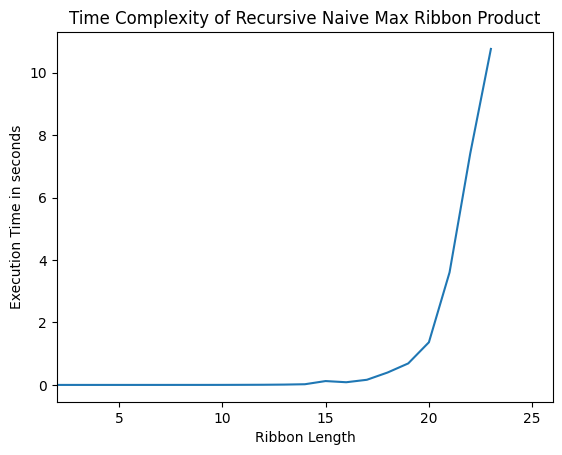

In [47]:
plt.plot(naive_times)
plt.xlim(start_length, end_length)
plt.title("Time Complexity of Recursive Naive Max Ribbon Product")
plt.xlabel("Ribbon Length")
plt.ylabel("Execution Time in seconds")

### Dynamic Max Ribbon Plot
The execution time for the naive max ribbon algorithm appears to follow a logarithmic curve. The times for each ribbon length were averaged over 10,000 runs. This provides a somewhat smooth curve with minor noise. More runs for a larger interval of ribbon lengths would possibly produce a more conclusive result.

Text(0, 0.5, 'Execution Time in seconds')

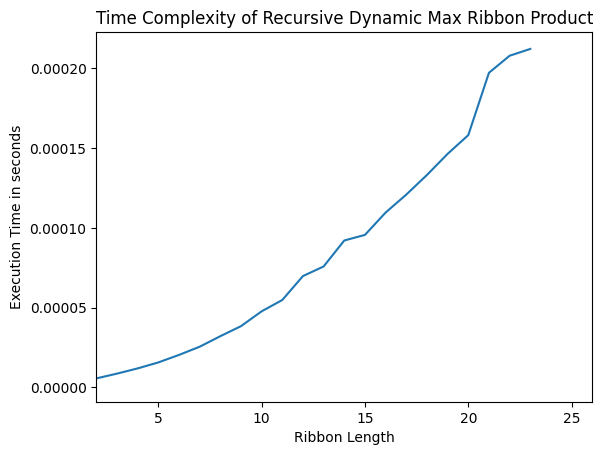

In [50]:
plt.plot(dynamic_times)
plt.xlim(start_length, end_length)
plt.title("Time Complexity of Recursive Dynamic Max Ribbon Product")
plt.xlabel("Ribbon Length")
plt.ylabel("Execution Time in seconds")